In [1]:
import time
import os
import json
import pandas as pd
import numpy as np
import networkx as nx
import networkx.algorithms.community as nxcom
import matplotlib.pyplot as plt
import matplotlib 
from scipy import stats
import collections
from csv import writer
import re
from collections import defaultdict
from statistics import mean

from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community.kclique import k_clique_communities
from networkx import edge_betweenness_centrality
from random import random
from itertools import islice
from matplotlib import cm

In [2]:
def itemgetter(*items):
    if len(items) == 1:
        item = items[0]
        def g(obj):
            return obj[item]
    else:
        def g(obj):
            return tuple(obj[item] for item in items)
    return g

In [3]:
def make_df(accounts, flag):
    
    frames = []

    for acc in accounts:

        if flag:
            save_folder = r'C:\Users\psrub\Documents\Python\Twitter\anti_scientific_data_2'
        else:
            save_folder = r'C:\Users\psrub\Documents\Python\Twitter\pro_scientific_data_2'
        save_path = os.path.join(save_folder,acc)
    
        account_json = os.path.join(save_path, 'account.json')
        following_json = os.path.join(save_path, 'following.json')

        account_df = pd.read_json(account_json,orient='index')

        following_df = pd.read_json(following_json)
        #following_df['Target'] = following_df['ID']
        following_df['Target'] = following_df['Screen_Name']
        following_df[['Source','Source_Screen_Name','Source_Description','Source_StatusesCount','Source_Follower_Count','Source_Following_Count']] =account_df[0][1], account_df[0][0], account_df[0][2], account_df[0][3], account_df[0][4], account_df[0][5]
        frames.append(following_df)
        
    big_df = pd.concat(frames,ignore_index=True)
    #display(big_df)
    return big_df

def analyze_graph(graph, k):
    
    start = time.time_ns()
    no_nodes = graph.number_of_nodes()
    no_edges = graph.number_of_edges()
    print(f'There are {no_nodes} nodes and {no_edges} edges')
    print(f'Processing time: {time.time_ns() - start} ns')
    
    degrees = [val for (node, val) in graph.degree()]
    max_deg = np.max(degrees)
    min_deg = np.min(degrees)
    print(f'The maximum degree is {max_deg}')   
    print(f'The minimum degree is {min_deg}')
    
    start = time.time_ns()
    mean_deg = np.mean(degrees)
    print(f'The average degree of the nodes is {mean_deg}')
    print(f'Processing time: {time.time_ns() - start} ns')
    
    start = time.time_ns()
    most_freq_deg = stats.mode(degrees)[0][0]
    print(f'The most frequent degree of the nodes found is {most_freq_deg}')
    print(f'Processing time: {time.time_ns() - start} ns')
    
    is_connected = nx.is_connected(graph)
    if is_connected:
        print("The graph is connected")
    else:
        print("The graph is not connected")
        
    start = time.time_ns()
    no_connected_comp = nx.number_connected_components(graph)
    print(f'There are {no_connected_comp} connected components')
    print(f'Processing time: {time.time_ns() - start} ns')
    
    largest_subgraph = max(list(graph.subgraph(c) for c in nx.connected_components(graph)), key=len)
    
    start = time.time_ns()
    largest_comp_no_nodes = largest_subgraph.number_of_nodes()
    largest_comp_no_edges = largest_subgraph.number_of_edges()
    print(f'There are {largest_comp_no_nodes} nodes and {largest_comp_no_edges} edges in the largest component')
    print(f'Processing time: {time.time_ns() - start} ns')
    
    start = time.time_ns()
    avg_clustering_coef = nx.average_clustering(graph)
    print(f'The average clustering coefficient in the graph is {avg_clustering_coef}')
    print(f'Processing time: {time.time_ns() - start} ns')
    
    start = time.time_ns()
    transitivity = nx.transitivity(graph)
    print(f'The transitivity of the graph is {transitivity}')
    print(f'Processing time: {time.time_ns() - start} ns')
    
    start = time.time_ns()
    diameter = nx.diameter(graph)
    print(f'The diameter of graph is {diameter}')
    print(f'Processing time: {time.time_ns() - start} ns')
    
    start = time.time_ns()
    avg_short_path = nx.average_shortest_path_length(graph)
    print(f'The average shortest path length is {avg_short_path}')
    print(f'Processing time: {time.time_ns() - start} ns')
    
    start = time.time_ns()
    graph_centrality = nx.degree_centrality(graph)
    max_de = max(graph_centrality.items(), key=itemgetter(1))
    print(f'Node with id {max_de[0]} has maximum degree centrality of the graph: {max_de[1]:.2f}')
    print(f'Processing time: {time.time_ns() - start} ns')
    
    start = time.time_ns()
    graph_closeness = nx.closeness_centrality(graph)
    max_clo = max(graph_closeness.items(), key=itemgetter(1))
    print(f'Node with id {max_clo[0]} has maximum closeness centrality of the graph: {max_clo[1]:.2f}')
    print(f'Processing time: {time.time_ns() - start} ns')
    
    start = time.time_ns()
    graph_betweenness = nx.betweenness_centrality(graph, normalized=True, endpoints=False)
    max_bet = max(graph_betweenness.items(), key=itemgetter(1))
    print(f'Node with id {max_bet[0]} has maximum betweenness centrality of the graph: {max_bet[1]:.2f}')
    print(f'Processing time: {time.time_ns() - start} ns')
    
    start = time.time_ns()
    eigenvector_centrality = nx.eigenvector_centrality(graph,max_iter=1000)
    max_eg = max(eigenvector_centrality.items(), key=itemgetter(1))
    print(f'Node with id {max_eg[0]} has maximum eigenvector centrality of the graph: {max_eg[1]:.2f}')
    print(f'Processing time: {time.time_ns() - start} ns')
    
    return [k, no_nodes, no_edges, max_deg, min_deg, mean_deg, most_freq_deg, is_connected, no_connected_comp, largest_comp_no_nodes, 
           largest_comp_no_edges, avg_clustering_coef, transitivity, diameter, avg_short_path, max_de[1], max_de[0], max_clo[1], 
           max_clo[0], max_bet[1], max_bet[0], max_eg[1], max_eg[0]]   

def analyze_directed_graph(graph, k):
    
    start = time.time_ns()
    no_nodes = graph.number_of_nodes()
    no_edges = graph.number_of_edges()
    print(f'There are {no_nodes} nodes and {no_edges} edges')
    print(f'Processing time: {time.time_ns() - start} ns')
    
    degrees = [val for (node, val) in graph.degree()]
    max_deg = np.max(degrees)
    min_deg = np.min(degrees)
    print(f'The maximum degree is {max_deg}')   
    print(f'The minimum degree is {min_deg}')
    
    start = time.time_ns()
    mean_deg = np.mean(degrees)
    print(f'The average degree of the nodes is {mean_deg}')
    print(f'Processing time: {time.time_ns() - start} ns')
    
    start = time.time_ns()
    most_freq_deg = stats.mode(degrees)[0][0]
    print(f'The most frequent degree of the nodes found is {most_freq_deg}')
    print(f'Processing time: {time.time_ns() - start} ns')
    
    start = time.time_ns()
    avg_clustering_coef = nx.average_clustering(graph)
    print(f'The average clustering coefficient in the graph is {avg_clustering_coef}')
    print(f'Processing time: {time.time_ns() - start} ns')
    
    start = time.time_ns()
    transitivity = nx.transitivity(graph)
    print(f'The transitivity of the graph is {transitivity}')
    print(f'Processing time: {time.time_ns() - start} ns')
    
    start = time.time_ns()
    avg_short_path = nx.average_shortest_path_length(graph)
    print(f'The average shortest path length is {avg_short_path}')
    print(f'Processing time: {time.time_ns() - start} ns')
 
    return [k, no_nodes, no_edges, max_deg, min_deg, mean_deg, most_freq_deg, avg_clustering_coef, transitivity, avg_short_path]

def analyze_centrality_measures(graph, measure):
    start = time.time_ns()
    mes = None
    if measure == "betweenness":
        mes = nx.betweenness_centrality(graph, normalized=True, endpoints=False)
    elif measure == "degree":
        mes = nx.degree_centrality(graph)
    elif measure == "closeness":
        mes = nx.closeness_centrality(graph)
    elif measure == "eigenvector":
        mes = nx.eigenvector_centrality(graph,max_iter=1000)
        
    print(f'Processing time: {time.time_ns() - start} ns')
    return mes

def print_graph(graph, k=None, save_path=None):
    
    if k:
        graph = nx.k_core(graph, k)
    
    pos = nx.spring_layout(graph, k=0.05)
    
    f, ax = plt.subplots(figsize=(16, 16))
    plt.style.use('ggplot')

    # c_range problem
    #nx.draw_networkx_nodes(graph, pos,alpha=0.8, node_color=range(c_range), cmap=plt.cm.PiYG, node_size=40)
    nx.draw_networkx_nodes(graph, pos,alpha=0.8, cmap=plt.cm.PiYG, node_size=40)
    nx.draw_networkx_labels(graph, pos, font_size=7, alpha = 0.5)
    nx.draw_networkx_edges(graph, pos, width=0.2, alpha=0.05, edge_color="black")
    
    if save_path:
        plt.savefig(save_path, dpi=500)
    plt.show()

def plot_deg_dist(graph):
    #plt.figure(figsize=(21,12))
    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12,8), constrained_layout=True)
    total_degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
    total_degreeCount = collections.Counter(total_degree_sequence)
    total_deg, total_cnt = zip(*total_degreeCount.items())
    
    #plt.subplot(3, 2, 1)
    ax[0,0].bar(total_deg, total_cnt, width=1, color="black")
    ax[0,0].set_title("a")
    ax[0,0].set_ylabel("Count")
    ax[0,0].set_xlabel("Degree")
    #plt.xticks([d + 0.4 for d in total_deg])
    
    #plt.subplot(3, 2, 2)
    ax[0,1].bar(total_deg, total_cnt, width=1, color="black")
    ax[0,1].set_title("b")
    ax[0,1].set_ylabel("Count")
    ax[0,1].set_xlabel("Degree")
    ax[0,1].set_xscale('log')
    #plt.xticks([d + 0.4 for d in total_deg])
       
    in_degree_sequence = sorted([d for n, d in graph.in_degree()], reverse=True)
    in_degreeCount = collections.Counter(in_degree_sequence)
    in_deg, in_cnt = zip(*in_degreeCount.items())
    
    #plt.subplot(3, 2, 3)
    ax[1,0].bar(in_deg, in_cnt, width=1, color="black")
    ax[1,0].set_title("c")
    ax[1,0].set_ylabel("Count")
    ax[1,0].set_xlabel("Degree")
    #plt.xticks([d + 0.4 for d in in_deg])
    
    #plt.subplot(3, 2, 4)
    ax[1,1].bar(in_deg, in_cnt, width=1, color="black")
    ax[1,1].set_title("d")
    ax[1,1].set_ylabel("Count")
    ax[1,1].set_xlabel("Degree")
    ax[1,1].set_xscale('log')
    #plt.xticks([d + 0.4 for d in in_deg])
       
    out_degree_sequence = sorted([d for n, d in graph.out_degree()], reverse=True)
    out_degreeCount = collections.Counter(out_degree_sequence)
    out_deg, out_cnt = zip(*out_degreeCount.items())
    
    #plt.subplot(3, 2, 5)
    ax[2,0].bar(out_deg, out_cnt, width=1, color="black")
    ax[2,0].set_title("e")
    ax[2,0].set_ylabel("Count")
    ax[2,0].set_xlabel("Degree")
    #plt.xticks([d + 0.4 for d in out_deg])
    
    #plt.subplot(3, 2, 6)
    ax[2,1].bar(out_deg, out_cnt, width=1, color="black")
    ax[2,1].set_title("f")
    ax[2,1].set_ylabel("Count")
    ax[2,1].set_xlabel("Degree")
    ax[2,1].set_xscale('log')
    #plt.xticks([d + 0.4 for d in out_deg])
    
    plt.show()

    
def append_list_as_row(file_name, list_of_elem):
    with open(file_name, 'a+', newline='') as write_obj:
        csv_writer = writer(write_obj)
        csv_writer.writerow(list_of_elem)
        
def plot_data(data1, data2, col_name, save_dir):
    fig, ax = plt.subplots(figsize=(14,14))
    ax.plot(data1['k'], data1[col_name], color="red", label='anti_'+col_name, marker='o')
    ax.plot(data2['k'], data2[col_name], color="blue", label='pro_'+col_name, marker='o')
    ax.set_xlabel('k')
    ax.set_ylabel(col_name)
    ax.grid(True)
    plt.legend()
    plt.show()
    save_path = os.path.join(save_dir, col_name+'.svg')
    fig.savefig(fname = save_path, dpi = 500)
    
def make_output(file_name, ks, graph, func):
    for k in ks:
        k_graph = nx.k_core(graph, k)
        try:
            append_list_as_row(file_name, func(k_graph, k))
        except ValueError:
            append_list_as_row(file_name, [])
            
def get_top_accounts_per_measure(measure_vals, measure, thresh, save_dir, flag):
    sorted_vals = sorted(measure_vals.items(),key=itemgetter(1), reverse=True)
    df = pd.DataFrame(columns=['Node_Name',measure])
    for i in range(thresh):
        df = df.append({'Node_Name': sorted_vals[i][0],measure: sorted_vals[i][1]}, ignore_index=True)
    display(df)
    if flag:      
        save_path = os.path.join(save_dir,'anti_' + measure + '.csv')
    else:
        save_path = os.path.join(save_dir,'pro_' + measure + '.csv')
    df.to_csv(save_path, index=False)
    
    return df

In [ ]:
with open('anti_scientific_accounts.txt', 'r') as f:
    anti_accounts = f.read().split(',')
    
with open('pro_scientific_accounts.txt', 'r') as f:
    pro_accounts = f.read().split(',')

df_anti = make_df(anti_accounts,1)
df_pro = make_df(pro_accounts,0)

G_anti = nx.from_pandas_edgelist(df=df_anti, source='Source', target='Target',edge_attr=True, create_using=nx.DiGraph())
G_pro = nx.from_pandas_edgelist(df=df_pro, source='Source', target='Target',edge_attr=True, create_using=nx.DiGraph())

In [ ]:
plots_dir = r'C:\Users\psrub\Documents\Python\Twitter\plots'


pro_directed_file = 'pro_directed_graph_desc.csv'
anti_directed_file = 'anti_directed_graph_desc.csv'


cols = ['k','no_nodes', 'no_edges', 'max_deg', 'min_deg', 'mean_deg', 'most_freq_deg', 'is_connected', 'no_connected_comp',
        'largest_comp_no_nodes', 'largest_comp_no_edges', 'avg_clustering_coef', 'transitivity', 'diameter', 'avg_short_path', 
       'max_deg_centrality', 'max_deg_centrality_node_id', 'max_close_centrality', 'max_close_centrality_node_id',
       'max_between_centrality', 'max_between_centrality_node_id','max_eigenvec_centrality', 'max_eigenvec_centrality_node_id']
cols_directed = ['k','no_nodes','no_edges','max_deg','min_deg','mean_deg','most_freq_deg','avg_clustering_coef','transitivity','avg_short_path']

append_list_as_row(pro_file, cols_directed)
append_list_as_row(anti_file, cols_directed)

In [ ]:
ks = [20, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
make_output(pro_directed_file, ks, G_pro, analyze_di_graph)
make_output(anti_directed_file, ks, G_anti, analyze_di_graph)

In [ ]:
pro_data = pd.read_csv(pro_directed_file,sep=',')
anti_data = pd.read_csv(anti_directed_file,sep=',')
for col in cols_directed:
    plot_data(anti_data,pro_data, col, plots_dir)

In [ ]:
G = nx.k_core(G_pro, 1)
betweenness = analyze_centrality_measures(G, 'betweenness')
degree = analyze_centrality_measures(G, 'degree')
closeness = analyze_centrality_measures(G, 'closeness')
eigenvector = analyze_centrality_measures(G, 'eigenvector')

In [ ]:
save_dir = r'C:\Users\psrub\Documents\Python\Twitter'
top_pro_betweenness = get_top_accounts_per_measure(betweenness,'betweenness',1000,save_dir,0)
top_pro_betweenness = get_top_accounts_per_measure(degree,'degree',1000,save_dir,0)
top_pro_betweenness = get_top_accounts_per_measure(closeness,'closeness',1000,save_dir,0)
top_pro_betweenness = get_top_accounts_per_measure(eigenvector,'eigenvector',1000,save_dir,0)

In [ ]:
G = nx.k_core(G_anti, 1)
betweenness = analyze_centrality_measures(G, 'betweenness')
degree = analyze_centrality_measures(G, 'degree')
closeness = analyze_centrality_measures(G, 'closeness')
eigenvector = analyze_centrality_measures(G, 'eigenvector')

In [ ]:
save_dir = r'C:\Users\psrub\Documents\Python\Twitter'
top_anti_betweenness = get_top_accounts_per_measure(betweenness,'betweenness',1000,save_dir, 1)
top_anti_betweenness = get_top_accounts_per_measure(degree,'degree',1000,save_dir, 1)
top_anti_betweenness = get_top_accounts_per_measure(closeness,'closeness',1000,save_dir, 1)
top_anti_betweenness = get_top_accounts_per_measure(eigenvector,'eigenvector',1000,save_dir, 1)

In [ ]:
G = nx.k_core(G_anti, 3)
print_graph(G,'G_anti_3_2.0.svg',G.number_of_nodes())

In [ ]:
G = nx.k_core(G_pro, 3)
print_graph(G,'G_pro_3.svg',G.number_of_nodes())

In [ ]:
plot_deg_dist(G,'log')

In [ ]:
# OLD ACCOUNTS
file_dir = r'C:\Users\psrub\Documents\Python\Twitter\files'

with open(os.path.join(file_dir,'anti_scientific_accounts.txt'), 'r') as f:
    base_anti_accounts = f.read().split(',')
    
with open(os.path.join(file_dir,'pro_scientific_accounts.txt'), 'r') as f:
    base_pro_accounts = f.read().split(',')

In [ ]:
file_dir = r'C:\Users\psrub\Documents\Python\Twitter\files\BASE_DATA_RESULTS'

# ANTI
anti_betweenness_accounts = pd.read_csv(os.path.join(file_dir, "anti_betweenness.csv"))
anti_closeness_accounts = pd.read_csv(os.path.join(file_dir, "anti_closeness.csv"))
anti_degree_accounts = pd.read_csv(os.path.join(file_dir, "anti_degree.csv"))
anti_eigenvector_accounts = pd.read_csv(os.path.join(file_dir, "anti_eigenvector.csv"))

# PRO
pro_betweenness_accounts = pd.read_csv(os.path.join(file_dir, "pro_betweenness.csv"))
pro_closeness_accounts = pd.read_csv(os.path.join(file_dir, "pro_closeness.csv"))
pro_degree_accounts = pd.read_csv(os.path.join(file_dir, "pro_degree.csv"))
pro_eigenvector_accounts = pd.read_csv(os.path.join(file_dir, "pro_eigenvector.csv"))

In [ ]:
# NEW ANTI ACCOUNTS

anti_betweenness_accounts = anti_betweenness_accounts['Node_Name'].tolist()[:50]
anti_closeness_accounts = anti_closeness_accounts['Node_Name'].tolist()[:50]
anti_degree_accounts = anti_degree_accounts['Node_Name'].tolist()[:50]
anti_eigenvector_accounts = anti_eigenvector_accounts['Node_Name'].tolist()[:50]

new_anti_accounts = anti_betweenness_accounts + anti_closeness_accounts + anti_degree_accounts + anti_eigenvector_accounts

In [ ]:
base_anti_accounts = [name[1:] for name in base_anti_accounts]
unique_new_anti_accounts = [acc for acc in new_anti_accounts if acc not in base_anti_accounts]

In [ ]:
len(unique_new_anti_accounts)

In [ ]:
unique_new_anti_accounts = list(set(unique_new_anti_accounts))

In [ ]:
# NEW PRO ACCOUNTS

pro_betweenness_accounts = pro_betweenness_accounts['Node_Name'].tolist()[:50]
pro_closeness_accounts = pro_closeness_accounts['Node_Name'].tolist()[:50]
pro_degree_accounts = pro_degree_accounts['Node_Name'].tolist()[:50]
pro_eigenvector_accounts = pro_eigenvector_accounts['Node_Name'].tolist()[:50]

new_pro_accounts = pro_betweenness_accounts + pro_closeness_accounts + pro_degree_accounts + pro_eigenvector_accounts

In [ ]:
base_pro_accounts = [name[1:] for name in base_pro_accounts]
unique_new_pro_accounts = [acc for acc in new_pro_accounts if acc not in base_pro_accounts]

In [ ]:
unique_new_pro_accounts = list(set(unique_new_pro_accounts))
len(unique_new_pro_accounts)

In [ ]:
# NEW ANTI ACCOUNTS WITH IS_HUB 

In [ ]:
new_anti_df = pd.DataFrame(columns=['Node_Name', 'Is_Hub'])

In [ ]:
new_anti_df = new_anti_df.assign(Node_Name=unique_new_anti_accounts)

In [ ]:
new_anti_df

In [ ]:
new_anti_df.iloc[82]['Is_Hub'] = 0

In [ ]:
new_anti_df.to_csv(os.path.join(file_dir,'new_anti_df.csv'), index=False)

In [ ]:
new_anti_df['Is_Hub'].value_counts()

In [ ]:
new_anti_df = pd.read_csv(os.path.join(file_dir, 'new_anti_df.csv'))

In [ ]:
new_anti_df.head()

In [ ]:
# RĘCZNA SKUTECZNOŚĆ ANTI
# ~ 72 %

In [ ]:
# NEW PRO ACCOUNTS WITH IS_HUB 

In [ ]:
new_pro_df = pd.DataFrame(columns=['Node_Name', 'Is_Hub'])

In [ ]:
new_pro_df = new_pro_df.assign(Node_Name=unique_new_pro_accounts)

In [ ]:
new_pro_df.iloc[56]['Is_Hub'] = 1

In [ ]:
new_pro_df.to_csv(os.path.join(file_dir,'new_pro_df.csv'), index=False)

In [ ]:
new_pro_df['Is_Hub'].value_counts()

In [ ]:
new_pro_df = pd.read_csv(os.path.join(file_dir, 'new_pro_df.csv'))

In [ ]:
new_pro_df.head()

In [ ]:
# RĘCZNA SKUTECZNOŚĆ PRO
# ~ 80 %

In [ ]:
tmp = new_pro_df[new_pro_df['Is_Hub']==1]

In [ ]:
tmp['Node_Name'].tolist()

In [ ]:
# TOP NEW HUBS ANTI ACCOUNTS PER METRIC 

In [ ]:
new_anti_df_hubs = new_anti_df[new_anti_df['Is_Hub']==1]
new_anti_df_hubs.head()

In [ ]:
top_anti_betweennes = pd.merge(anti_betweenness_accounts[:], new_anti_df_hubs, on="Node_Name", left_index=False, right_index=True).drop_duplicates()
print(f'All accounts: {len(top_anti_betweennes)}')
print(f'All accounts from top 50: {len(top_anti_betweennes[top_anti_betweennes.index < 50])}')
top_anti_betweennes

In [ ]:
top_anti_closeness = pd.merge(anti_closeness_accounts, new_anti_df_hubs, on="Node_Name", left_index=False, right_index=True).drop_duplicates()
print(f'All accounts: {len(top_anti_closeness)}')
print(f'All accounts from top 50: {len(top_anti_closeness[top_anti_closeness.index < 50])}')
top_anti_closeness

In [ ]:
top_anti_degree = pd.merge(anti_degree_accounts, new_anti_df_hubs, on="Node_Name", left_index=False, right_index=True).drop_duplicates()
print(f'All accounts: {len(top_anti_degree)}')
print(f'All accounts from top 50: {len(top_anti_degree[top_anti_degree.index < 50])}')
top_anti_degree

In [ ]:
top_anti_eigenvector = pd.merge(anti_eigenvector_accounts, new_anti_df_hubs, on="Node_Name", left_index=False, right_index=True).drop_duplicates()
print(f'All accounts: {len(top_anti_eigenvector)}')
print(f'All accounts from top 50: {len(top_anti_eigenvector[top_anti_eigenvector.index < 50])}')
top_anti_eigenvector

In [ ]:
# TOP NEW HUBS PRO ACCOUNTS PER METRIC 

In [ ]:
new_pro_df_hubs = new_pro_df[new_pro_df['Is_Hub']==1]
new_pro_df_hubs.head()

In [ ]:
top_pro_betweennes = pd.merge(pro_betweenness_accounts[:], new_pro_df_hubs, on="Node_Name", left_index=False, right_index=True).drop_duplicates()
print(f'All accounts: {len(top_pro_betweennes)}')
print(f'All accounts from top 50: {len(top_pro_betweennes[top_pro_betweennes.index < 50])}')
top_pro_betweennes

In [ ]:
top_pro_closeness = pd.merge(pro_closeness_accounts[:], new_pro_df_hubs, on="Node_Name", left_index=False, right_index=True).drop_duplicates()
print(f'All accounts: {len(top_pro_closeness)}')
print(f'All accounts from top 50: {len(top_pro_closeness[top_pro_closeness.index < 50])}')
top_pro_closeness

In [ ]:
top_pro_degree = pd.merge(pro_degree_accounts[:], new_pro_df_hubs, on="Node_Name", left_index=False, right_index=True).drop_duplicates()
print(f'All accounts: {len(top_pro_degree)}')
print(f'All accounts from top 50: {len(top_pro_degree[top_pro_degree.index < 50])}')
top_pro_degree

In [ ]:
top_pro_eigenvector = pd.merge(pro_eigenvector_accounts[:], new_pro_df_hubs, on="Node_Name", left_index=False, right_index=True).drop_duplicates()
print(f'All accounts: {len(top_pro_eigenvector)}')
print(f'All accounts from top 50: {len(top_pro_eigenvector[top_pro_eigenvector.index < 50])}')
top_pro_eigenvector

In [4]:
def make_df_new(accounts_path):
    
    frames = []
    
    accounts = os.listdir(accounts_path)
    i = 0

    for acc in accounts:
        
        acc_path = os.path.join(accounts_path, acc)
        try:
            account_df = pd.read_json(os.path.join(acc_path, 'account.json'), orient='index')
            following_df = pd.read_json(os.path.join(acc_path, 'following.json'))

            following_df['Target'] = following_df['Screen_Name']
            following_df[['Source','Source_Screen_Name','Source_Description','Source_StatusesCount','Source_Follower_Count','Source_Following_Count']] = account_df[0][1], account_df[0][0], account_df[0][2], account_df[0][3], account_df[0][4], account_df[0][5]

            frames.append(following_df)

        except Exception as ex:
            print(ex,acc_path)
            i += 1
            continue
    print(i)
        
    big_df = pd.concat(frames, ignore_index=True)
    #display(big_df)
    return big_df

In [ ]:
# ANALYZE NETWORK FROM 1 AUTOMATED DATA DOWNLOAD

In [ ]:
base_anti_accounts_path_1_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_1\base_anti_hubs'
hand_picked_new_anti_hubs_path_1_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_1\hand_picked_base_anti_hubs'

base_pro_accounts_path_1_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_1\base_pro_hubs'
hand_picked_new_pro_hubs_path_1_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_1\hand_picked_base_pro_hubs'

anti_save_dir_path_1_1_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_1\new_anti_hubs_auto_1'
pro_save_dir_path_1_1_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_1\new_pro_hubs_auto_1'

anti_save_dir_path_2_1_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_1\new_anti_hubs_auto_2'
pro_save_dir_path_2_1_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_1\new_pro_hubs_auto_2'

anti_save_dir_path_3_1_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_1\new_anti_hubs_auto_3'
pro_save_dir_path_3_1_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_1\new_pro_hubs_auto_3'

anti_save_dir_path_4_1_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_1\new_anti_hubs_auto_4'
pro_save_dir_path_4_1_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_1\new_pro_hubs_auto_4'

anti_save_dir_path_5_1_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_1\new_anti_hubs_auto_5'
pro_save_dir_path_5_1_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_1\new_pro_hubs_auto_5'

anti_save_dir_path_6_1_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_1\new_anti_hubs_auto_6'
pro_save_dir_path_6_1_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_1\new_pro_hubs_auto_6'

anti_save_dir_path_7_1_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_1\new_anti_hubs_auto_7'
pro_save_dir_path_7_1_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_1\new_pro_hubs_auto_7'

In [ ]:
# FULL NETWORK

In [ ]:
df_anti_base_1_iter = make_df_new(base_anti_accounts_path_1_iter)
df_anti_hand_picked_1_iter = make_df_new(hand_picked_new_anti_hubs_path_1_iter)

df_anti_1_1_iter = make_df_new(anti_save_dir_path_1_1_iter)
df_anti_2_1_iter = make_df_new(anti_save_dir_path_2_1_iter)
df_anti_3_1_iter = make_df_new(anti_save_dir_path_3_1_iter)
df_anti_4_1_iter = make_df_new(anti_save_dir_path_4_1_iter)
df_anti_5_1_iter = make_df_new(anti_save_dir_path_5_1_iter)
df_anti_6_1_iter = make_df_new(anti_save_dir_path_6_1_iter)
df_anti_7_1_iter = make_df_new(anti_save_dir_path_7_1_iter)

In [ ]:
df_anti_all_1_iter = pd.concat([df_anti_base_1_iter, df_anti_hand_picked_1_iter, df_anti_1_1_iter, df_anti_2_1_iter, df_anti_3_1_iter, df_anti_4_1_iter, df_anti_5_1_iter, df_anti_6_1_iter, df_anti_7_1_iter], ignore_index=True)

In [ ]:
df_anti_all_1_iter

In [ ]:
df_pro_base_1_iter = make_df_new(base_pro_accounts_path_1_iter)
df_pro_hand_picked_1_iter = make_df_new(hand_picked_new_pro_hubs_path_1_iter)

df_pro_1_1_iter = make_df_new(pro_save_dir_path_1_1_iter)
df_pro_2_1_iter = make_df_new(pro_save_dir_path_2_1_iter)
df_pro_3_1_iter = make_df_new(pro_save_dir_path_3_1_iter)
df_pro_4_1_iter = make_df_new(pro_save_dir_path_4_1_iter)
df_pro_5_1_iter = make_df_new(pro_save_dir_path_5_1_iter)

In [ ]:
df_pro_all_1_iter = pd.concat([df_pro_base_1_iter, df_pro_hand_picked_1_iter, df_pro_1_1_iter, df_pro_2_1_iter, df_pro_3_1_iter, df_pro_4_1_iter, df_pro_5_1_iter], ignore_index=True)

In [ ]:
df_pro_all_1_iter

In [ ]:
G_anti_1_iter = nx.from_pandas_edgelist(df=df_anti_all_1_iter, source='Source', target='Target', edge_attr=True, create_using=nx.DiGraph())
G_pro_1_iter = nx.from_pandas_edgelist(df=df_pro_all_1_iter, source='Source', target='Target', edge_attr=True, create_using=nx.DiGraph())

In [ ]:
analyze_directed_graph(G_anti_1_iter, 1)

In [ ]:
analyze_directed_graph(G_pro_1_iter, 1)

In [ ]:
# ONLY HUBS NETWORK

In [ ]:
pro_account_names_1_iter = os.listdir(base_pro_accounts_path_1_iter)+ os.listdir(hand_picked_new_pro_hubs_path_1_iter) \
+ os.listdir(pro_save_dir_path_1_1_iter) + os.listdir(pro_save_dir_path_2_1_iter) + os.listdir(pro_save_dir_path_3_1_iter) \
+ os.listdir(pro_save_dir_path_4_1_iter) + os.listdir(pro_save_dir_path_5_1_iter)

pro_account_names_1_iter = [re.sub(r'@','', acc) for acc in pro_account_names_1_iter]

anti_account_names_1_iter = os.listdir(base_anti_accounts_path_1_iter)+ os.listdir(hand_picked_new_anti_hubs_path_1_iter) \
+ os.listdir(anti_save_dir_path_1_1_iter) + os.listdir(anti_save_dir_path_2_1_iter) + os.listdir(anti_save_dir_path_3_1_iter) \
+ os.listdir(anti_save_dir_path_4_1_iter) + os.listdir(anti_save_dir_path_5_1_iter) + os.listdir(anti_save_dir_path_6_1_iter) \
+ os.listdir(anti_save_dir_path_7_1_iter)

anti_account_names_1_iter = [re.sub(r'@','', acc) for acc in anti_account_names_1_iter]

In [ ]:
df_pro_hubs_1_iter = df_pro_all_1_iter[df_pro_all_1_iter.Target.isin(pro_account_names_1_iter)]

In [ ]:
df_pro_hubs_1_iter['Target'].value_counts()

In [ ]:
df_pro_hubs_1_iter.head()

In [ ]:
pro_total_number_of_followers_1_iter = df_pro_hubs_1_iter.drop_duplicates(subset=['Target'])['Follower_Count'].sum()
print(f"Total number of followers for pro hubs: {pro_total_number_of_followers_1_iter}")

In [ ]:
df_anti_hubs_1_iter = df_anti_all_1_iter[df_anti_all_1_iter.Target.isin(anti_account_names_1_iter)]
#df_anti_hubs_1_iter = df_anti_all_1_iter[df_anti_all_1_iter.Source.isin(anti_account_names_1_iter)]

In [ ]:
df_anti_hubs_1_iter.shape

In [ ]:
df_anti_hubs_1_iter['Source'].value_counts()

In [ ]:
df_anti_hubs_1_iter.head()

In [ ]:
anti_total_number_of_followers_1_iter = df_anti_hubs_1_iter.drop_duplicates(subset=['Target'])['Follower_Count'].sum()
print(f"Total number of followers for anti hubs: {anti_total_number_of_followers_1_iter}")

In [ ]:
G_anti_hubs_1_iter = nx.from_pandas_edgelist(df=df_anti_hubs_1_iter, source='Source', target='Target', edge_attr=True, create_using=nx.DiGraph())
G_pro_hubs_1_iter = nx.from_pandas_edgelist(df=df_pro_hubs_1_iter, source='Source', target='Target', edge_attr=True, create_using=nx.DiGraph())

In [ ]:
G_anti_hubs_undirected_1_iter = G_anti_hubs_1_iter.to_undirected()
G_pro_hubs_undirected_1_iter = G_pro_hubs_1_iter.to_undirected()

In [ ]:
plots_dir_1_iter = r'C:\Users\psrub\Documents\Python\Twitter\plots\AUTOMATED_ITERATION_1'

pro_directed_file_1_iter = r'C:\Users\psrub\Documents\Python\Twitter\files\AUTOMATED_ITERATION_1_RESULTS\pro_directed_graph_params.csv'
anti_directed_file_1_iter = r'C:\Users\psrub\Documents\Python\Twitter\files\AUTOMATED_ITERATION_1_RESULTS\anti_directed_graph_params.csv'

cols_directed = ['k','no_nodes','no_edges','max_deg','min_deg','mean_deg','most_freq_deg','avg_clustering_coef','transitivity','avg_short_path']

# append_list_as_row(pro_directed_file, cols_directed)
# append_list_as_row(anti_directed_file, cols_directed)

In [ ]:
ks = [20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
make_output(anti_directed_file_1_iter, ks, G_anti_hubs_1_iter, analyze_directed_graph)
make_output(pro_directed_file_1_iter, ks, G_pro_hubs_1_iter, analyze_directed_graph)

In [ ]:
pro_data_1_iter = pd.read_csv(pro_directed_file_1_iter, sep=',')
anti_data_1_iter = pd.read_csv(anti_directed_file_1_iter, sep=',')

for col in cols_directed:
    plot_data(anti_data_1_iter, pro_data_1_iter, col, plots_dir_1_iter)

In [ ]:
plot_deg_dist(G_pro_hubs_1_iter)

In [ ]:
plt.figure(figsize=(12,8))

total_degree_sequence = sorted([d for n, d in G_anti_hubs_undirected_1_iter.degree()], reverse=True)
total_degreeCount = collections.Counter(total_degree_sequence)
total_deg, total_cnt = zip(*total_degreeCount.items())

plt.subplot(1, 2, 1)
plt.bar(total_deg, total_cnt, width=2, color="b")
plt.title("Total Degree Histogram for undirected graph")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.xticks([d + 0.4 for d in total_deg])

plt.subplot(1, 2, 2)
plt.bar(total_deg, total_cnt, width=2, color="b")
plt.title("Total Degree Histogram for undirected graph")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.xscale('log')
#plt.xticks([d + 0.4 for d in total_deg])

In [ ]:
plot_deg_dist(G_pro_hubs_1_iter)

In [ ]:
plt.figure(figsize=(16,12))

total_degree_sequence = sorted([d for n, d in G_pro_hubs_undirected.degree()], reverse=True)
total_degreeCount = collections.Counter(total_degree_sequence)
total_deg, total_cnt = zip(*total_degreeCount.items())

plt.subplot(1, 2, 1)
plt.bar(total_deg, total_cnt, width=2, color="b")
plt.title("Total Degree Histogram for undirected graph")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.xticks([d + 0.4 for d in total_deg])

plt.subplot(1, 2, 2)
plt.bar(total_deg, total_cnt, width=2, color="b")
plt.title("Total Degree Histogram for undirected graph")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.xscale('log')
#plt.xticks([d + 0.4 for d in total_deg])

In [ ]:
print_graph(G_anti_hubs_1_iter, k=69)

In [ ]:
print_graph(G_pro_hubs_1_iter, k=100)

In [ ]:
anti_betweenness_1_iter = analyze_centrality_measures(G_anti_hubs_1_iter, 'betweenness')
anti_degree_1_iter = analyze_centrality_measures(G_anti_hubs_1_iter, 'degree')
anti_closeness_1_iter = analyze_centrality_measures(G_anti_hubs_1_iter, 'closeness')
anti_eigenvector_1_iter = analyze_centrality_measures(G_anti_hubs_1_iter, 'eigenvector')

In [ ]:
pro_betweenness_1_iter = analyze_centrality_measures(G_pro_hubs_1_iter, 'betweenness')
pro_degree_1_iter = analyze_centrality_measures(G_pro_hubs_1_iter, 'degree')
pro_closeness_1_iter = analyze_centrality_measures(G_pro_hubs_1_iter, 'closeness')
pro_eigenvector_1_iter = analyze_centrality_measures(G_pro_hubs_1_iter, 'eigenvector')

In [ ]:
save_dir_1_iter = r'C:\Users\psrub\Documents\Python\Twitter\files\AUTOMATED_ITERATION_1'


top_anti_betweenness_1_iter = get_top_accounts_per_measure(anti_betweenness_1_iter, 'betweenness', len(anti_betweenness_1_iter), save_dir_1_iter, 1)
top_anti_degree_1_iter = get_top_accounts_per_measure(anti_degree_1_iter, 'degree', len(anti_degree_1_iter), save_dir, 1)
top_anti_closeness_1_iter = get_top_accounts_per_measure(anti_closeness_1_iter, 'closeness', len(anti_closeness_1_iter), save_dir_1_iter, 1)
top_anti_eigenvector_1_iter = get_top_accounts_per_measure(anti_eigenvector_1_iter, 'eigenvector', len(anti_eigenvector_1_iter), save_dir_1_iter, 1)

top_pro_betweenness_1_iter = get_top_accounts_per_measure(pro_betweenness_1_iter, 'betweenness', len(pro_betweenness_1_iter), save_dir_1_iter, 0)
top_pro_degree_1_iter = get_top_accounts_per_measure(pro_degree_1_iter, 'degree', len(pro_degree_1_iter), save_dir_1_iter, 0)
top_pro_closeness_1_iter = get_top_accounts_per_measure(pro_closeness_1_iter, 'closeness', len(pro_closeness_1_iter), save_dir_1_iter, 0)
top_pro_eigenvector_1_iter = get_top_accounts_per_measure(pro_eigenvector_1_iter, 'eigenvector', len(pro_eigenvector_1_iter), save_dir_1_iter, 0)

In [ ]:
#top_anti_betweenness_1_iter.head(20)
#top_anti_degree_1_iter.head(20)
#top_anti_closeness_1_iter.head(20)
top_anti_eigenvector_1_iter.head(20)

In [ ]:
#top_pro_betweenness_1_iter.head(20)
#top_pro_degree_1_iter.head(20)
#top_pro_closeness_1_iter.head(20)
top_pro_eigenvector_1_iter.head(20)

In [ ]:
# ANALYZE NETWORK FROM 2 AUTOMATED DATA DOWNLOAD

In [5]:
base_anti_accounts_path_2_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_2\base_anti_hubs'
hand_picked_new_anti_hubs_path_2_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_2\hand_picked_base_anti_hubs'

base_pro_accounts_path_2_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_2\base_pro_hubs'
hand_picked_new_pro_hubs_path_2_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_2\hand_picked_base_pro_hubs'

anti_save_dir_path_1_2_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_2\new_anti_hubs_1'
pro_save_dir_path_1_2_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_2\new_pro_hubs_1'

anti_save_dir_path_2_2_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_2\new_anti_hubs_2'
pro_save_dir_path_2_2_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_2\new_pro_hubs_2'

anti_save_dir_path_3_2_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_2\new_anti_hubs_3'
pro_save_dir_path_3_2_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_2\new_pro_hubs_3'

anti_save_dir_path_4_2_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_2\new_anti_hubs_4'
pro_save_dir_path_4_2_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_2\new_pro_hubs_4'

In [6]:
# FULL NETWORK

In [7]:
df_anti_base_2_iter = make_df_new(base_anti_accounts_path_2_iter)
df_anti_hand_picked_2_iter = make_df_new(hand_picked_new_anti_hubs_path_2_iter)

df_anti_1_2_iter = make_df_new(anti_save_dir_path_1_2_iter)
df_anti_2_2_iter = make_df_new(anti_save_dir_path_2_2_iter)
df_anti_3_2_iter = make_df_new(anti_save_dir_path_3_2_iter)

Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_2\base_anti_hubs\@avoiceforchoice
Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_2\base_anti_hubs\@BusyDrT
Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_2\base_anti_hubs\@DrBenTapper1
Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_2\base_anti_hubs\@DrMadej
'Screen_Name' E:\Twitter_data\AUTOMATED_ITERATION_2\base_anti_hubs\@DrSamBenjamin
Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_2\base_anti_hubs\@EMFAustralia
Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_2\base_anti_hubs\@hollyhaygood
Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_2\base_anti_hubs\@Its_Stationary
Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_2\base_anti_hubs\@Knowfree77
Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_2\base_anti_hubs\@NickHudsonCT
Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_2\base_anti_hubs\@Scotland5g
Expecte

In [8]:
df_anti_all_2_iter = pd.concat([df_anti_base_2_iter, df_anti_hand_picked_2_iter, df_anti_1_2_iter, df_anti_2_2_iter, df_anti_3_2_iter], ignore_index=True)

In [9]:
df_anti_all_2_iter.head()

,ID,Screen_Name,Description,StatusesCount,Follower_Count,Following_Count,Target,Source,Source_Screen_Name,Source_Description,Source_StatusesCount,Source_Follower_Count,Source_Following_Count
0,1348956607963680769,The5Gfacts,#5G Myths & half-truths are being told by the ...,180,112,52,The5Gfacts,5gAwareness,1103668951710662656,The latest news on the NOT so GREAT RESET,181,1163,62
1,1253444984,Sofia_Wakum,_PAPUA_My Life ...,372,140,184,Sofia_Wakum,5gAwareness,1103668951710662656,The latest news on the NOT so GREAT RESET,181,1163,62
2,581999965,RealDeanCain,Father. Filmmaker. Freedom. Family. Tweet only...,32831,594707,1391,RealDeanCain,5gAwareness,1103668951710662656,The latest news on the NOT so GREAT RESET,181,1163,62
3,1495338620,lizardbutts,,1415,51,143,lizardbutts,5gAwareness,1103668951710662656,The latest news on the NOT so GREAT RESET,181,1163,62
4,806344552718045184,drsimonegold,Doctor • Lawyer • Warrior 🥼 Founder of America...,1025,464345,117,drsimonegold,5gAwareness,1103668951710662656,The latest news on the NOT so GREAT RESET,181,1163,62


In [10]:
df_pro_base_2_iter = make_df_new(base_pro_accounts_path_2_iter)
df_pro_hand_picked_2_iter = make_df_new(hand_picked_new_pro_hubs_path_2_iter)

df_pro_1_2_iter = make_df_new(pro_save_dir_path_1_2_iter)
df_pro_2_2_iter = make_df_new(pro_save_dir_path_2_2_iter)
df_pro_3_2_iter = make_df_new(pro_save_dir_path_3_2_iter)
df_pro_4_2_iter = make_df_new(pro_save_dir_path_4_2_iter)

Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_2\base_pro_hubs\@JFGariepy
1
0
Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_2\new_pro_hubs_1\AndrewMayne
Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_2\new_pro_hubs_1\ApostropheBooks
Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_2\new_pro_hubs_1\asmithblog
Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_2\new_pro_hubs_1\BellaLack
Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_2\new_pro_hubs_1\benlandis
Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_2\new_pro_hubs_1\ChemistPD
Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_2\new_pro_hubs_1\CMichaelGibson
Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_2\new_pro_hubs_1\DerekAudette
'Screen_Name' E:\Twitter_data\AUTOMATED_ITERATION_2\new_pro_hubs_1\DiggScience
Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_2\new_pro_hubs_1\DrLindaMD
Expected object or v

In [11]:
df_pro_all_2_iter = pd.concat([df_pro_base_2_iter, df_pro_hand_picked_2_iter, df_pro_1_2_iter, df_pro_2_2_iter, df_pro_3_2_iter, df_pro_4_2_iter], ignore_index=True)

In [12]:
df_pro_all_2_iter.head()

,ID,Screen_Name,Description,StatusesCount,Follower_Count,Following_Count,Target,Source,Source_Screen_Name,Source_Description,Source_StatusesCount,Source_Follower_Count,Source_Following_Count
0,2928030234,thePiggsBoson,Science writer majoring in quantum mechanics. ...,17084,57560,43,thePiggsBoson,2020science,15480686.0,Undisciplined academic. Occasionally writes bo...,35611.0,19809.0,3503.0
1,65733755,MarcusCooks,Ethiopia to Sweden to Harlem. Always #chasingf...,19574,439547,1130,MarcusCooks,2020science,15480686.0,Undisciplined academic. Occasionally writes bo...,35611.0,19809.0,3503.0
2,814652974765080576,Simpson_Glass,"Glass artist, inspired by scientific, astrophy...",50,126,46,Simpson_Glass,2020science,15480686.0,Undisciplined academic. Occasionally writes bo...,35611.0,19809.0,3503.0
3,14178225,jayblackisfunny,Comedian. Screenwriter. Occasional MSNBC guy. ...,24728,28537,651,jayblackisfunny,2020science,15480686.0,Undisciplined academic. Occasionally writes bo...,35611.0,19809.0,3503.0
4,1444726902447644676,TheLiuniverse,A half-hour dose of cosmic conversation with s...,486,285,164,TheLiuniverse,2020science,15480686.0,Undisciplined academic. Occasionally writes bo...,35611.0,19809.0,3503.0


In [13]:
# ONLY HUBS NETWORK

In [14]:
pro_account_names_2_iter = os.listdir(base_pro_accounts_path_2_iter)+ os.listdir(hand_picked_new_pro_hubs_path_2_iter) \
+ os.listdir(pro_save_dir_path_1_2_iter) + os.listdir(pro_save_dir_path_2_2_iter) + os.listdir(pro_save_dir_path_3_2_iter) \
+ os.listdir(pro_save_dir_path_4_2_iter)

pro_account_names_2_iter = [re.sub(r'@','', acc) for acc in pro_account_names_2_iter]

anti_account_names_2_iter = os.listdir(base_anti_accounts_path_2_iter)+ os.listdir(hand_picked_new_anti_hubs_path_2_iter) \
+ os.listdir(anti_save_dir_path_1_2_iter) + os.listdir(anti_save_dir_path_2_2_iter) + os.listdir(anti_save_dir_path_3_2_iter) \
+ os.listdir(anti_save_dir_path_4_2_iter)

anti_account_names_2_iter = [re.sub(r'@','', acc) for acc in anti_account_names_2_iter]

In [15]:
df_pro_hubs_2_iter = df_pro_all_2_iter[df_pro_all_2_iter.Target.isin(pro_account_names_2_iter)]

In [16]:
df_pro_hubs_2_iter['Target'].value_counts()

elonmusk         299
NateSilver538    277
BillGates        269
NASA             249
edyong209        248
                ... 
DMC_Ryan           1
Anjyoun            1
C_P_Gurnani        1
NedsDread          1
DoYouScience       1
Name: Target, Length: 818, dtype: int64

In [17]:
df_pro_hubs_2_iter.head()

,ID,Screen_Name,Description,StatusesCount,Follower_Count,Following_Count,Target,Source,Source_Screen_Name,Source_Description,Source_StatusesCount,Source_Follower_Count,Source_Following_Count
27,14807898,elakdawalla,Buy my art! https://t.co/kHbt5SSKan 🪐 Planetar...,81630,173019,2814,elakdawalla,2020science,15480686.0,Undisciplined academic. Occasionally writes bo...,35611.0,19809.0,3503.0
35,33836629,karpathy,"Director of AI at Tesla, leading the Autopilot...",7260,477839,683,karpathy,2020science,15480686.0,Undisciplined academic. Occasionally writes bo...,35611.0,19809.0,3503.0
38,187909268,ProfRWinston,Prof science & society Imperial College London...,682,45198,49,ProfRWinston,2020science,15480686.0,Undisciplined academic. Occasionally writes bo...,35611.0,19809.0,3503.0
39,17939037,ProfBrianCox,Professor of Particle Physics at The Universit...,29981,3052931,952,ProfBrianCox,2020science,15480686.0,Undisciplined academic. Occasionally writes bo...,35611.0,19809.0,3503.0
40,13982132,medialab,News from the MIT Media Lab,17769,481502,1251,medialab,2020science,15480686.0,Undisciplined academic. Occasionally writes bo...,35611.0,19809.0,3503.0


In [18]:
pro_total_number_of_followers_2_iter = df_pro_hubs_2_iter.drop_duplicates(subset=['Target'])['Follower_Count'].sum()
print(f"Total number of followers for pro hubs: {pro_total_number_of_followers_2_iter}")

Total number of followers for pro hubs: 610616343


In [19]:
df_anti_hubs_2_iter = df_anti_all_2_iter[df_anti_all_2_iter.Target.isin(anti_account_names_2_iter)]

In [20]:
df_anti_hubs_2_iter['Target'].value_counts()

RealCandaceO       105
RandPaul            91
RobertKennedyJr     90
DonaldJTrumpJr      86
ZubyMusic           83
                  ... 
AncestralApoth       1
PdxTreehouse         1
MargoCatholic        1
marsrader            1
DrSamBenjamin        1
Name: Target, Length: 271, dtype: int64

In [21]:
df_anti_hubs_2_iter.head()

,ID,Screen_Name,Description,StatusesCount,Follower_Count,Following_Count,Target,Source,Source_Screen_Name,Source_Description,Source_StatusesCount,Source_Follower_Count,Source_Following_Count
4,806344552718045184,drsimonegold,Doctor • Lawyer • Warrior 🥼 Founder of America...,1025,464345,117,drsimonegold,5gAwareness,1103668951710662656,The latest news on the NOT so GREAT RESET,181,1163,62
9,123975474,jonrappoport,Investigative reporter for over 35 years. http...,7619,74021,14408,jonrappoport,5gAwareness,1103668951710662656,The latest news on the NOT so GREAT RESET,181,1163,62
14,39344374,DonaldJTrumpJr,"Future leader Ministry of Truth, Father, Outdo...",45123,8133104,1638,DonaldJTrumpJr,5gAwareness,1103668951710662656,The latest news on the NOT so GREAT RESET,181,1163,62
24,970298456110698498,Stop5G,Exposing The 5G #PsychoTechnocrats,4169,1298,934,Stop5G,5gAwareness,1103668951710662656,The latest news on the NOT so GREAT RESET,181,1163,62
31,1154143826576990209,5GAwarenessNow,I am fighting to preserve individual rights du...,1881,869,156,5GAwarenessNow,5gAwareness,1103668951710662656,The latest news on the NOT so GREAT RESET,181,1163,62


In [22]:
anti_total_number_of_followers_2_iter = df_anti_hubs_2_iter.drop_duplicates(subset=['Target'])['Follower_Count'].sum()
print(f"Total number of followers for anti hubs: {anti_total_number_of_followers_2_iter}")

Total number of followers for anti hubs: 76275796


In [23]:
G_anti_hubs_2_iter = nx.from_pandas_edgelist(df=df_anti_hubs_2_iter, source='Source', target='Target', edge_attr=True, create_using=nx.DiGraph())
G_pro_hubs_2_iter = nx.from_pandas_edgelist(df=df_pro_hubs_2_iter, source='Source', target='Target', edge_attr=True, create_using=nx.DiGraph())

In [ ]:
G_anti_hubs_undirected_2_iter = G_anti_hubs_2_iter.to_undirected()
G_pro_hubs_undirected_2_iter = G_pro_hubs_2_iter.to_undirected()

In [28]:
plots_dir_2_iter = r'C:\Users\psrub\Documents\Python\Twitter\plots\AUTOMATED_ITERATION_2'

pro_directed_file_2_iter = r'C:\Users\psrub\Documents\Python\Twitter\files\AUTOMATED_ITERATION_2_RESULTS\pro_directed_graph_params.csv'
anti_directed_file_2_iter = r'C:\Users\psrub\Documents\Python\Twitter\files\AUTOMATED_ITERATION_2_RESULTS\anti_directed_graph_params.csv'

cols_directed = ['k','no_nodes','no_edges','max_deg','min_deg','mean_deg','most_freq_deg','avg_clustering_coef','transitivity','avg_short_path']

# append_list_as_row(pro_directed_file_2_iter, cols_directed)
# append_list_as_row(anti_directed_file_2_iter, cols_directed)

In [ ]:
ks = [20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
make_output(anti_directed_file_2_iter, ks, G_anti_hubs_2_iter, analyze_directed_graph)
make_output(pro_directed_file_2_iter, ks, G_pro_hubs_2_iter, analyze_directed_graph)

In [ ]:
pro_data_2_iter = pd.read_csv(pro_directed_file_2_iter, sep=',')
anti_data_2_iter = pd.read_csv(anti_directed_file_2_iter, sep=',')

for col in cols_directed:
    plot_data(anti_data_2_iter, pro_data_2_iter, col, plots_dir_2_iter)

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(anti_data_1_iter['k'], anti_data_1_iter['avg_clustering_coef'], color="red", label='1_iteratrion', marker='o')
ax.plot(anti_data_2_iter['k'], anti_data_2_iter['avg_clustering_coef'], color="blue", label='2_iteratrion', marker='o')
ax.set_xlabel('k')
ax.set_ylabel('avg_clustering_coef')
#ax.grid(True)
plt.legend()
plt.show()

In [ ]:
plot_deg_dist(G_pro_hubs_2_iter)

In [46]:
def plot_deg_dist_2(graph1, graph2, bin_size):
    # TODO - zrobić binowanie histogramu
    
    #plt.figure(figsize=(21,12))
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), constrained_layout=True)
        
    in_degree_sequence_1 = sorted([d for n, d in graph1.in_degree()], reverse=True)
    in_degreeCount_1 = collections.Counter(in_degree_sequence_1)
    in_deg_1, in_cnt_1 = zip(*in_degreeCount_1.items())
    
    in_bin_means_1, in_bin_edges_1, binnumber = stats.binned_statistic(in_deg_1, in_cnt_1, statistic='mean', bins=int(max(in_deg_1)/bin_size))
    in_bin_means_1 = np.nan_to_num(in_bin_means_1)
    in_bin_width_1 = (in_bin_edges_1[1] - in_bin_edges_1[0])
    in_bin_centers_1 = in_bin_edges_1[1:] - in_bin_width_1/2
    
    out_degree_sequence_1 = sorted([d for n, d in graph1.out_degree()], reverse=True)
    out_degreeCount_1 = collections.Counter(out_degree_sequence_1)
    out_deg_1, out_cnt_1 = zip(*out_degreeCount_1.items())
    
    out_bin_means_1, out_bin_edges_1, binnumber = stats.binned_statistic(out_deg_1, out_cnt_1, statistic='mean', bins=int(max(out_deg_1)/bin_size))
    out_bin_means_1 = np.nan_to_num(out_bin_means_1)
    out_bin_width_1 = (out_bin_edges_1[1] - out_bin_edges_1[0])
    out_bin_centers_1 = out_bin_edges_1[1:] - out_bin_width_1/2
    
    in_degree_sequence_2 = sorted([d for n, d in graph2.in_degree()], reverse=True)
    in_degreeCount_2 = collections.Counter(in_degree_sequence_2)
    in_deg_2, in_cnt_2 = zip(*in_degreeCount_2.items())
    
    in_bin_means_2, in_bin_edges_2, binnumber = stats.binned_statistic(in_deg_2, in_cnt_2, statistic='mean', bins=int(max(in_deg_2)/bin_size))
    in_bin_means_2 = np.nan_to_num(in_bin_means_2)
    in_bin_width_2 = (in_bin_edges_2[1] - in_bin_edges_2[0])
    in_bin_centers_2 = in_bin_edges_2[1:] - in_bin_width_2/2
    
    out_degree_sequence_2 = sorted([d for n, d in graph2.out_degree()], reverse=True)
    out_degreeCount_2 = collections.Counter(out_degree_sequence_2)
    out_deg_2, out_cnt_2 = zip(*out_degreeCount_2.items())
    
    out_bin_means_2, out_bin_edges_2, binnumber = stats.binned_statistic(out_deg_2, out_cnt_2, statistic='mean', bins=int(max(out_deg_2)/bin_size))
    out_bin_means_2 = np.nan_to_num(out_bin_means_2)
    out_bin_width_2 = (out_bin_edges_2[1] - out_bin_edges_2[0])
    out_bin_centers_2 = out_bin_edges_2[1:] - out_bin_width_2/2
    
    ax[0].plot(in_bin_centers_1, in_bin_means_1, color="blue", label='I iteration',linestyle='--', marker='o', markersize=10)
    ax[0].plot(in_bin_centers_2, in_bin_means_2, color="navy", label='II iteration',linestyle='--', marker='o', markersize=10)
    ax[0].set_title("a")
    ax[0].set_ylabel("Count")
    ax[0].set_xlabel("In degree")
    #ax[0].set_xscale('log')
    ax[0].legend(fontsize=12)
    
    #plt.xticks([d + 0.4 for d in in_deg])
    
    ax[1].plot(out_bin_centers_1, out_bin_means_1, color="blue", label='I iteration',linestyle='--', marker='o', markersize=10)
    ax[1].plot(out_bin_centers_2, out_bin_means_2, color="navy", label='II iteration',linestyle='--', marker='o', markersize=10)
    ax[1].set_title("b")
    ax[1].set_ylabel("Count")
    ax[1].set_xlabel("Out degree")
    #ax[1].set_xscale('log')
    ax[1].legend(fontsize=12)
    #plt.xticks([d + 0.4 for d in in_deg])
    
    plt.show()

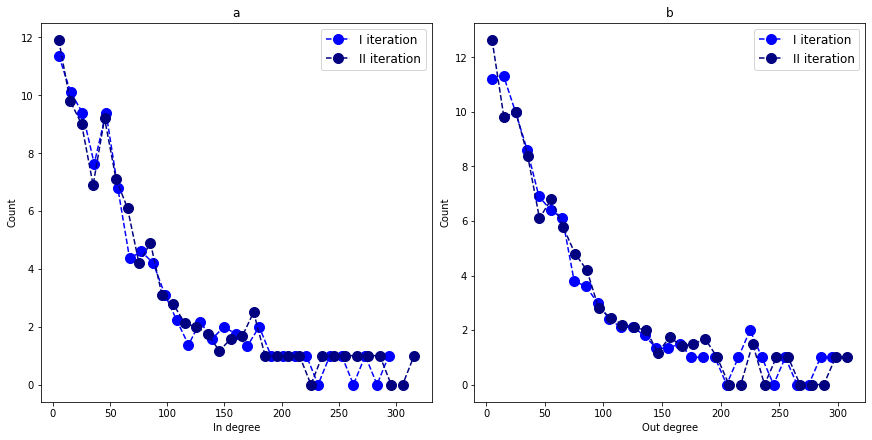

In [47]:
plot_deg_dist_2(G_pro_hubs_2_iter, G_pro_hubs_3_iter, 10)

In [ ]:
plot_deg_dist(G_pro_hubs_2_iter)

In [ ]:
plt.figure(figsize=(16,12))

total_degree_sequence = sorted([d for n, d in G_pro_hubs_undirected.degree()], reverse=True)
total_degreeCount = collections.Counter(total_degree_sequence)
total_deg, total_cnt = zip(*total_degreeCount.items())

plt.subplot(1, 2, 1)
plt.bar(total_deg, total_cnt, width=2, color="b")
plt.title("Total Degree Histogram for undirected graph")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.xticks([d + 0.4 for d in total_deg])

plt.subplot(1, 2, 2)
plt.bar(total_deg, total_cnt, width=2, color="b")
plt.title("Total Degree Histogram for undirected graph")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.xscale('log')
#plt.xticks([d + 0.4 for d in total_deg])

In [ ]:
print_graph(G_anti_hubs, k=30)

In [ ]:
print_graph(G_pro_hubs, k=70)

In [ ]:
anti_betweenness = analyze_centrality_measures(G_anti_hubs, 'betweenness')
anti_degree = analyze_centrality_measures(G_anti_hubs, 'degree')
anti_closeness = analyze_centrality_measures(G_anti_hubs, 'closeness')
anti_eigenvector = analyze_centrality_measures(G_anti_hubs, 'eigenvector')

In [ ]:
pro_betweenness = analyze_centrality_measures(G_pro_hubs, 'betweenness')
pro_degree = analyze_centrality_measures(G_pro_hubs, 'degree')
pro_closeness = analyze_centrality_measures(G_pro_hubs, 'closeness')
pro_eigenvector = analyze_centrality_measures(G_pro_hubs, 'eigenvector')

In [ ]:
save_dir = r'C:\Users\psrub\Documents\Python\Twitter\files\AUTOMATED_ITERATION_2_RESULTS'


top_anti_betweenness = get_top_accounts_per_measure(anti_betweenness, 'betweenness', len(anti_betweenness), save_dir, 1)
top_anti_degree = get_top_accounts_per_measure(anti_degree, 'degree', len(anti_degree), save_dir, 1)
top_anti_closeness = get_top_accounts_per_measure(anti_closeness, 'closeness', len(anti_closeness), save_dir, 1)
top_anti_eigenvector = get_top_accounts_per_measure(anti_eigenvector, 'eigenvector', len(anti_eigenvector), save_dir, 1)

top_pro_betweenness = get_top_accounts_per_measure(pro_betweenness, 'betweenness', len(pro_betweenness), save_dir, 0)
top_pro_degree = get_top_accounts_per_measure(pro_degree, 'degree', len(pro_degree), save_dir, 0)
top_pro_closeness = get_top_accounts_per_measure(pro_closeness, 'closeness', len(pro_closeness), save_dir, 0)
top_pro_eigenvector = get_top_accounts_per_measure(pro_eigenvector, 'eigenvector', len(pro_eigenvector), save_dir, 0)

In [ ]:
# FILTRATED 1 ITER HUB NETWORK WITH ACCOUTNS FROM 2 ITER

In [ ]:
df_pro_hubs_1_iter_filtered_with_hubs_from_2_iter = df_pro_all_1_iter[df_pro_all_1_iter.Target.isin(pro_account_names_2_iter)]
df_pro_hubs_1_iter_without_hubs_from_2_iter = df_pro_hubs_1_iter[~(df_pro_hubs_1_iter.Target.isin(pro_account_names_2_iter))]

In [ ]:
df_pro_hubs_1_iter_filtered_with_hubs_from_2_iter.shape

In [ ]:
df_pro_hubs_1_iter_without_hubs_from_2_iter.shape

In [ ]:
pro_total_number_of_followers_1_iter_filtered_with_hubs_from_2_iter = df_pro_hubs_1_iter_filtered_with_hubs_from_2_iter.drop_duplicates(subset=['Target'])['Follower_Count'].sum()
print(f"Total number of followers for pro hubs (16.02): {pro_total_number_of_followers_1_iter_filtered_with_hubs_from_2_iter}")

pro_total_number_of_followers_2_iter = df_pro_hubs_2_iter.drop_duplicates(subset=['Target'])['Follower_Count'].sum()
print(f"Total number of followers for pro hubs (07.04): {pro_total_number_of_followers_2_iter}")

print(f'Increase of {round(100 - 100 *pro_total_number_of_followers_1_iter_filtered_with_hubs_from_2_iter/pro_total_number_of_followers_2_iter, 2)} %')

In [ ]:
G_pro_hubs_1_iter_filtered_with_hubs_from_2_iter = nx.from_pandas_edgelist(df=df_pro_hubs_1_iter_filtered_with_hubs_from_2_iter, source='Source', target='Target', edge_attr=True, create_using=nx.DiGraph())
G_pro_hubs_1_iter_without_hubs_from_2_iter = nx.from_pandas_edgelist(df=df_pro_hubs_1_iter_without_hubs_from_2_iter, source='Source', target='Target', edge_attr=True, create_using=nx.DiGraph())

In [ ]:
plot_deg_dist(G_pro_hubs_1_iter_filtered_with_hubs_from_2_iter)

In [ ]:
df_anti_hubs_1_iter_filtered_with_hubs_from_2_iter = df_anti_all_1_iter[df_anti_all_1_iter.Target.isin(anti_account_names_2_iter)]
df_anti_hubs_1_iter_without_hubs_from_2_iter = df_anti_hubs_1_iter[~(df_anti_hubs_1_iter.Target.isin(anti_account_names_2_iter))]

In [ ]:
anti_total_number_of_followers_1_iter_filtered_with_hubs_from_2_iter = df_anti_hubs_1_iter_filtered_with_hubs_from_2_iter.drop_duplicates(subset=['Target'])['Follower_Count'].sum()
print(f"Total number of followers for anti hubs (16.02): {anti_total_number_of_followers_1_iter_filtered_with_hubs_from_2_iter}")

anti_total_number_of_followers_2_iter = df_anti_hubs_2_iter.drop_duplicates(subset=['Target'])['Follower_Count'].sum()
print(f"Total number of followers for anti hubs (07.04): {anti_total_number_of_followers_2_iter}")

print(f'Increase of {round(100 - 100 *anti_total_number_of_followers_1_iter_filtered_with_hubs_from_2_iter/anti_total_number_of_followers_2_iter, 2)} %')

In [ ]:
G_anti_hubs_1_iter_filtered_with_hubs_from_2_iter = nx.from_pandas_edgelist(df=df_anti_hubs_1_iter_filtered_with_hubs_from_2_iter, source='Source', target='Target', edge_attr=True, create_using=nx.DiGraph())
G_anti_hubs_1_iter_without_hubs_from_2_iter = nx.from_pandas_edgelist(df=df_anti_hubs_1_iter_without_hubs_from_2_iter, source='Source', target='Target', edge_attr=True, create_using=nx.DiGraph())

In [ ]:
print(df_anti_hubs_1_iter_filtered_with_hubs_from_2_iter.shape)
print(df_anti_hubs_1_iter_without_hubs_from_2_iter.shape)

In [ ]:
plots_dir_1_iter_filtered_with_hubs_from_2_iter = r'C:\Users\psrub\Documents\Python\Twitter\plots\AUTOMATED_ITERATION_1_FILTERED_WITH_HUBS_FROM_2_ITER'
plots_dir_1_iter_without_hubs_from_2_iter = r'C:\Users\psrub\Documents\Python\Twitter\plots\AUTOMATED_ITERATION_1_WITHOUT_HUBS_FROM_2_ITER'


pro_directed_file_1_iter_filtered_with_hubs_from_2_iter = r'C:\Users\psrub\Documents\Python\Twitter\files\AUTOMATED_ITERATION_1_FILTERED_WITH_HUBS_FROM_2_ITER_RESULTS\pro_directed_graph_params.csv'
anti_directed_file_1_iter_filtered_with_hubs_from_2_iter = r'C:\Users\psrub\Documents\Python\Twitter\files\AUTOMATED_ITERATION_1_FILTERED_WITH_HUBS_FROM_2_ITER_RESULTS\anti_directed_graph_params.csv'

pro_directed_file_1_iter_without_hubs_from_2_iter = r'C:\Users\psrub\Documents\Python\Twitter\files\AUTOMATED_ITERATION_1_WITHOUT_HUBS_FROM_2_ITER_RESULTS\pro_directed_graph_params.csv'
anti_directed_file_1_iter_without_hubs_from_2_iter = r'C:\Users\psrub\Documents\Python\Twitter\files\AUTOMATED_ITERATION_1_WITHOUT_HUBS_FROM_2_ITER_RESULTS\anti_directed_graph_params.csv'



cols_directed = ['k','no_nodes','no_edges','max_deg','min_deg','mean_deg','most_freq_deg','avg_clustering_coef','transitivity','avg_short_path']

append_list_as_row(pro_directed_file_1_iter_filtered_with_hubs_from_2_iter, cols_directed)
append_list_as_row(anti_directed_file_1_iter_filtered_with_hubs_from_2_iter, cols_directed)

append_list_as_row(pro_directed_file_1_iter_without_hubs_from_2_iter, cols_directed)
append_list_as_row(anti_directed_file_1_iter_without_with_hubs_from_2_iter, cols_directed)

In [ ]:
ks = [20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
make_output(pro_directed_file_1_iter_filtered_with_hubs_from_2_iter, ks, G_pro_hubs_1_iter_filtered_with_hubs_from_2_iter, analyze_directed_graph)
make_output(anti_directed_file_1_iter_filtered_with_hubs_from_2_iter, ks, G_anti_hubs_1_iter_filtered_with_hubs_from_2_iter, analyze_directed_graph)

make_output(pro_directed_file_1_iter_without_hubs_from_2_iter, ks, G_pro_hubs_1_iter_without_hubs_from_2_iter, analyze_directed_graph)
make_output(anti_directed_file_1_iter_without_hubs_from_2_iter, ks, G_anti_hubs_1_iter_without_hubs_from_2_iter, analyze_directed_graph)

In [ ]:
pro_data_1_iter_filtered_with_hubs_from_2_iter = pd.read_csv(pro_directed_file_1_iter_filtered_with_hubs_from_2_iter, sep=',')
anti_data_1_iter_filtered_with_hubs_from_2_iter = pd.read_csv(anti_directed_file_1_iter_without_hubs_from_2_iter, sep=',')

pro_data_1_iter_without_hubs_from_2_iter = pd.read_csv(pro_directed_file_1_iter_without_hubs_from_2_iter, sep=',')
anti_data_1_iter_without_hubs_from_2_iter = pd.read_csv(anti_directed_file_1_iter_without_hubs_from_2_iter, sep=',')


# for col in cols_directed:
#     plot_data(anti_data_1_iter_filtered_with_hubs_from_2_iter, pro_data_1_iter_filtered_with_hubs_from_2_iter, col, plots_dir_1_iter_filtered_with_hubs_from_2_iter)

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(pro_data_1_iter_filtered_with_hubs_from_2_iter['k'], pro_data_1_iter_filtered_with_hubs_from_2_iter['transitivity'], color="red", label='1_iteratrion_filtered_with_hubs_from_2_iteration', marker='o')
ax.plot(pro_data_2_iter['k'], pro_data_2_iter['transitivity'], color="blue", label='2_iteratrion', marker='o')
ax.set_xlabel('k')
ax.set_ylabel('transitivity')
#ax.grid(True)
plt.legend(loc='best')
plt.show()

In [ ]:
plot_deg_dist(G_anti_hubs_1_iter_filtered_with_hubs_from_2_iter)

In [ ]:
anti_betweenness = analyze_centrality_measures(G_anti_hubs_1_iter_without_hubs_from_2_iter, 'betweenness')
anti_degree = analyze_centrality_measures(G_anti_hubs_1_iter_without_hubs_from_2_iter, 'degree')
anti_closeness = analyze_centrality_measures(G_anti_hubs_1_iter_without_hubs_from_2_iter, 'closeness')
anti_eigenvector = analyze_centrality_measures(G_anti_hubs_1_iter_without_hubs_from_2_iter, 'eigenvector')

In [ ]:
pro_betweenness = analyze_centrality_measures(G_pro_hubs_1_iter_without_hubs_from_2_iter, 'betweenness')
pro_degree = analyze_centrality_measures(G_pro_hubs_1_iter_without_hubs_from_2_iter, 'degree')
pro_closeness = analyze_centrality_measures(G_pro_hubs_1_iter_without_hubs_from_2_iter, 'closeness')
pro_eigenvector = analyze_centrality_measures(G_pro_hubs_1_iter_without_hubs_from_2_iter, 'eigenvector')

In [ ]:
save_dir = r'C:\Users\psrub\Documents\Python\Twitter\files\AUTOMATED_ITERATION_1_WITHOUT_HUBS_FROM_2_ITER_RESULTS'


top_anti_betweenness = get_top_accounts_per_measure(anti_betweenness, 'betweenness', len(anti_betweenness), save_dir, 1)
top_anti_degree = get_top_accounts_per_measure(anti_degree, 'degree', len(anti_degree), save_dir, 1)
top_anti_closeness = get_top_accounts_per_measure(anti_closeness, 'closeness', len(anti_closeness), save_dir, 1)
top_anti_eigenvector = get_top_accounts_per_measure(anti_eigenvector, 'eigenvector', len(anti_eigenvector), save_dir, 1)

top_pro_betweenness = get_top_accounts_per_measure(pro_betweenness, 'betweenness', len(pro_betweenness), save_dir, 0)
top_pro_degree = get_top_accounts_per_measure(pro_degree, 'degree', len(pro_degree), save_dir, 0)
top_pro_closeness = get_top_accounts_per_measure(pro_closeness, 'closeness', len(pro_closeness), save_dir, 0)
top_pro_eigenvector = get_top_accounts_per_measure(pro_eigenvector, 'eigenvector', len(pro_eigenvector), save_dir, 0)

In [1]:
# ANALYZE NETWORK FROM 3 AUTOMATED DATA DOWNLOAD

In [24]:
base_anti_accounts_path_3_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_3\base_anti_hubs'
hand_picked_new_anti_hubs_path_3_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_3\hand_picked_base_anti_hubs'

base_pro_accounts_path_3_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_3\base_pro_hubs'
hand_picked_new_pro_hubs_path_3_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_3\hand_picked_base_pro_hubs'

anti_save_dir_path_1_3_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_3\new_anti_hubs_1'
pro_save_dir_path_1_3_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_3\new_pro_hubs_1'

anti_save_dir_path_2_3_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_3\new_anti_hubs_2'
pro_save_dir_path_2_3_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_3\new_pro_hubs_2'

anti_save_dir_path_3_3_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_3\new_anti_hubs_3'
pro_save_dir_path_3_3_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_3\new_pro_hubs_3'

anti_save_dir_path_4_3_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_3\new_anti_hubs_4'
pro_save_dir_path_4_3_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_3\new_pro_hubs_4'

In [25]:
# FULL NETWORK

In [26]:
df_anti_base_3_iter = make_df_new(base_anti_accounts_path_3_iter)
df_anti_hand_picked_3_iter = make_df_new(hand_picked_new_anti_hubs_path_3_iter)

df_anti_1_3_iter = make_df_new(anti_save_dir_path_1_3_iter)
df_anti_2_3_iter = make_df_new(anti_save_dir_path_2_3_iter)

Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_3\base_anti_hubs\@avoiceforchoice
Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_3\base_anti_hubs\@BusyDrT
Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_3\base_anti_hubs\@DrBenTapper1
Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_3\base_anti_hubs\@DrMadej
'Screen_Name' E:\Twitter_data\AUTOMATED_ITERATION_3\base_anti_hubs\@DrSamBenjamin
Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_3\base_anti_hubs\@EMFAustralia
Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_3\base_anti_hubs\@hollyhaygood
Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_3\base_anti_hubs\@Its_Stationary
Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_3\base_anti_hubs\@Knowfree77
Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_3\base_anti_hubs\@NickHudsonCT
Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_3\base_anti_hubs\@Scotland5g
Expecte

In [27]:
df_anti_all_3_iter = pd.concat([df_anti_base_3_iter, df_anti_hand_picked_3_iter, df_anti_1_3_iter, df_anti_2_3_iter], ignore_index=True)

In [28]:
df_pro_base_3_iter = make_df_new(base_pro_accounts_path_3_iter)
df_pro_hand_picked_3_iter = make_df_new(hand_picked_new_pro_hubs_path_3_iter)

df_pro_1_3_iter = make_df_new(pro_save_dir_path_1_3_iter)
df_pro_2_3_iter = make_df_new(pro_save_dir_path_2_3_iter)
df_pro_3_3_iter = make_df_new(pro_save_dir_path_3_3_iter)
df_pro_4_3_iter = make_df_new(pro_save_dir_path_4_3_iter)

Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_3\base_pro_hubs\@JFGariepy
1
0
Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_3\new_pro_hubs_1\AllisonPearson
Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_3\new_pro_hubs_1\AndrewMayne
Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_3\new_pro_hubs_1\ApostropheBooks
Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_3\new_pro_hubs_1\asmithblog
Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_3\new_pro_hubs_1\BellaLack
Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_3\new_pro_hubs_1\benlandis
'Screen_Name' E:\Twitter_data\AUTOMATED_ITERATION_3\new_pro_hubs_1\bruce_arthur
Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_3\new_pro_hubs_1\ChemistPD
Expected object or value E:\Twitter_data\AUTOMATED_ITERATION_3\new_pro_hubs_1\DerekAudette
'Screen_Name' E:\Twitter_data\AUTOMATED_ITERATION_3\new_pro_hubs_1\DiggScience
Expected object or value E:\

In [29]:
df_pro_all_3_iter = pd.concat([df_pro_base_3_iter, df_pro_hand_picked_3_iter, df_pro_1_3_iter, df_pro_2_3_iter, df_pro_3_3_iter, df_pro_4_3_iter], ignore_index=True)

In [30]:
pro_account_names_3_iter = os.listdir(base_pro_accounts_path_3_iter)+ os.listdir(hand_picked_new_pro_hubs_path_3_iter) \
+ os.listdir(pro_save_dir_path_1_3_iter) + os.listdir(pro_save_dir_path_2_3_iter) + os.listdir(pro_save_dir_path_3_3_iter) \
+ os.listdir(pro_save_dir_path_4_3_iter)

pro_account_names_3_iter = [re.sub(r'@','', acc) for acc in pro_account_names_3_iter]

anti_account_names_3_iter = os.listdir(base_anti_accounts_path_3_iter)+ os.listdir(hand_picked_new_anti_hubs_path_3_iter) \
+ os.listdir(anti_save_dir_path_1_3_iter) + os.listdir(anti_save_dir_path_2_3_iter) + os.listdir(anti_save_dir_path_3_3_iter) \
+ os.listdir(anti_save_dir_path_4_3_iter)

anti_account_names_3_iter = [re.sub(r'@','', acc) for acc in anti_account_names_3_iter]

In [31]:
df_pro_hubs_3_iter = df_pro_all_3_iter[df_pro_all_3_iter.Target.isin(pro_account_names_3_iter)]

In [32]:
df_pro_hubs_3_iter['Target'].value_counts()

elonmusk         321
NateSilver538    283
BillGates        278
edyong209        270
NASA             251
                ... 
MKutney            1
DoYouScience       1
alex_moukala       1
ZZ0                1
dasjoshua          1
Name: Target, Length: 843, dtype: int64

In [33]:
pro_total_number_of_followers_3_iter = df_pro_hubs_3_iter.drop_duplicates(subset=['Target'])['Follower_Count'].sum()
print(f"Total number of followers for pro hubs: {pro_total_number_of_followers_3_iter}")

Total number of followers for pro hubs: 617484414


In [34]:
df_anti_hubs_3_iter = df_anti_all_3_iter[df_anti_all_3_iter.Target.isin(anti_account_names_3_iter)]

In [35]:
df_anti_hubs_3_iter['Target'].value_counts()

RealCandaceO       97
RobertKennedyJr    90
RandPaul           87
PrisonPlanet       82
drsimonegold       78
                   ..
DuncanBannatyne     1
AncestralApoth      1
DrSamBenjamin       1
poojabeditweets     1
Anastas32451695     1
Name: Target, Length: 267, dtype: int64

In [36]:
anti_total_number_of_followers_3_iter = df_anti_hubs_3_iter.drop_duplicates(subset=['Target'])['Follower_Count'].sum()
print(f"Total number of followers for anti hubs: {anti_total_number_of_followers_3_iter}")

Total number of followers for anti hubs: 59529055


In [37]:
G_anti_hubs_3_iter = nx.from_pandas_edgelist(df=df_anti_hubs_3_iter, source='Source', target='Target', edge_attr=True, create_using=nx.DiGraph())
G_pro_hubs_3_iter = nx.from_pandas_edgelist(df=df_pro_hubs_3_iter, source='Source', target='Target', edge_attr=True, create_using=nx.DiGraph())

In [78]:
nx.info(G_anti_hubs_3_iter)

<ipython-input-78-082f1aa62b15>:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G_anti_hubs_3_iter)


'DiGraph with 278 nodes and 7655 edges'

In [43]:
plots_dir_3_iter = r'C:\Users\psrub\Documents\Python\Twitter\plots\AUTOMATED_ITERATION_3'

pro_directed_file_3_iter = r'C:\Users\psrub\Documents\Python\Twitter\files\AUTOMATED_ITERATION_3_RESULTS\pro_directed_graph_params.csv'
anti_directed_file_3_iter = r'C:\Users\psrub\Documents\Python\Twitter\files\AUTOMATED_ITERATION_3_RESULTS\anti_directed_graph_params.csv'

cols_directed = ['k','no_nodes','no_edges','max_deg','min_deg','mean_deg','most_freq_deg','avg_clustering_coef','transitivity','avg_short_path']

# append_list_as_row(pro_directed_file_3_iter, cols_directed)
# append_list_as_row(anti_directed_file_3_iter, cols_directed)

In [35]:
ks = [20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
make_output(anti_directed_file_3_iter, ks, G_anti_hubs_3_iter, analyze_directed_graph)
make_output(pro_directed_file_3_iter, ks, G_pro_hubs_3_iter, analyze_directed_graph)

There are 209 nodes and 7050 edges
Processing time: 0 ns
The maximum degree is 180
The minimum degree is 20
The average degree of the nodes is 67.46411483253588
Processing time: 0 ns
The most frequent degree of the nodes found is 76
Processing time: 1989700 ns
The average clustering coefficient in the graph is 0.46791101242286015
Processing time: 283247100 ns
The transitivity of the graph is 0.4148108334079847
Processing time: 66814500 ns
The average shortest path length is 2.109587780640412
Processing time: 271253500 ns
There are 210 nodes and 7069 edges
Processing time: 0 ns
The maximum degree is 181
The minimum degree is 19
The average degree of the nodes is 67.32380952380953
Processing time: 994400 ns
The most frequent degree of the nodes found is 76
Processing time: 0 ns
The average clustering coefficient in the graph is 0.46810350479007246
Processing time: 330083500 ns
The transitivity of the graph is 0.41344558799921516
Processing time: 59840100 ns
The average shortest path leng

The average shortest path length is 2.184699649815929
Processing time: 276261000 ns
There are 262 nodes and 7629 edges
Processing time: 0 ns
The maximum degree is 208
The minimum degree is 4
The average degree of the nodes is 58.23664122137404
Processing time: 967200 ns
The most frequent degree of the nodes found is 43
Processing time: 0 ns
The average clustering coefficient in the graph is 0.4323648563953281
Processing time: 278276600 ns
The transitivity of the graph is 0.37987808152962027
Processing time: 57851700 ns
The average shortest path length is 2.208651399491094
Processing time: 310143400 ns
There are 266 nodes and 7641 edges
Processing time: 0 ns
The maximum degree is 208
The minimum degree is 3
The average degree of the nodes is 57.45112781954887
Processing time: 997600 ns
The most frequent degree of the nodes found is 43
Processing time: 997900 ns
The average clustering coefficient in the graph is 0.430836023089763
Processing time: 286233100 ns
The transitivity of the grap

The average clustering coefficient in the graph is 0.2847204666322579
Processing time: 2924581500 ns
The transitivity of the graph is 0.23111518243290055
Processing time: 686161000 ns
The average shortest path length is 2.182878536971704
Processing time: 6461008800 ns
There are 820 nodes and 45488 edges
Processing time: 0 ns
The maximum degree is 423
The minimum degree is 8
The average degree of the nodes is 110.94634146341464
Processing time: 0 ns
The most frequent degree of the nodes found is 20
Processing time: 1995600 ns
The average clustering coefficient in the graph is 0.2850158072669993
Processing time: 2798807900 ns
The transitivity of the graph is 0.23095751443975124
Processing time: 684182000 ns
The average shortest path length is 2.1805354537061854
Processing time: 6792120600 ns
There are 825 nodes and 45522 edges
Processing time: 0 ns
The maximum degree is 423
The minimum degree is 7
The average degree of the nodes is 110.35636363636364
Processing time: 0 ns
The most freque

In [44]:
pro_data_2_iter = pd.read_csv(pro_directed_file_2_iter, sep=',')
anti_data_2_iter = pd.read_csv(anti_directed_file_2_iter, sep=',')

pro_data_3_iter = pd.read_csv(pro_directed_file_3_iter, sep=',')
anti_data_3_iter = pd.read_csv(anti_directed_file_3_iter, sep=',')

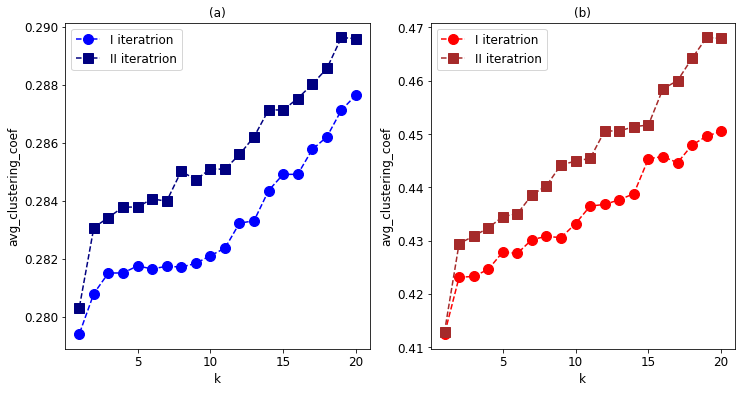

In [72]:
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

fig, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].plot(pro_data_2_iter['k'], pro_data_2_iter['avg_clustering_coef'], color="blue", label='I iteratrion', linestyle='--', marker='o', markersize=10)
ax[0].plot(pro_data_3_iter['k'], pro_data_3_iter['avg_clustering_coef'], color="navy", label='II iteratrion', linestyle='--', marker='s', markersize=10)
ax[0].set_xlabel('k', fontsize=12)
ax[0].set_ylabel('avg_clustering_coef', fontsize=12)
ax[0].set_title('(a)', fontsize=12)
ax[0].legend(loc='best', fontsize=12)

ax[1].plot(anti_data_2_iter['k'], anti_data_2_iter['avg_clustering_coef'], color="red", label='I iteratrion', linestyle='--', marker='o', markersize=10)
ax[1].plot(anti_data_3_iter['k'], anti_data_3_iter['avg_clustering_coef'], color="brown", label='II iteratrion', linestyle='--', marker='s', markersize=10)
ax[1].set_xlabel('k', fontsize=12)
ax[1].set_ylabel('avg_clustering_coef', fontsize=12)
ax[1].set_title('(b)', fontsize=12)
ax[1].legend(loc='best', fontsize=12)

plt.show()

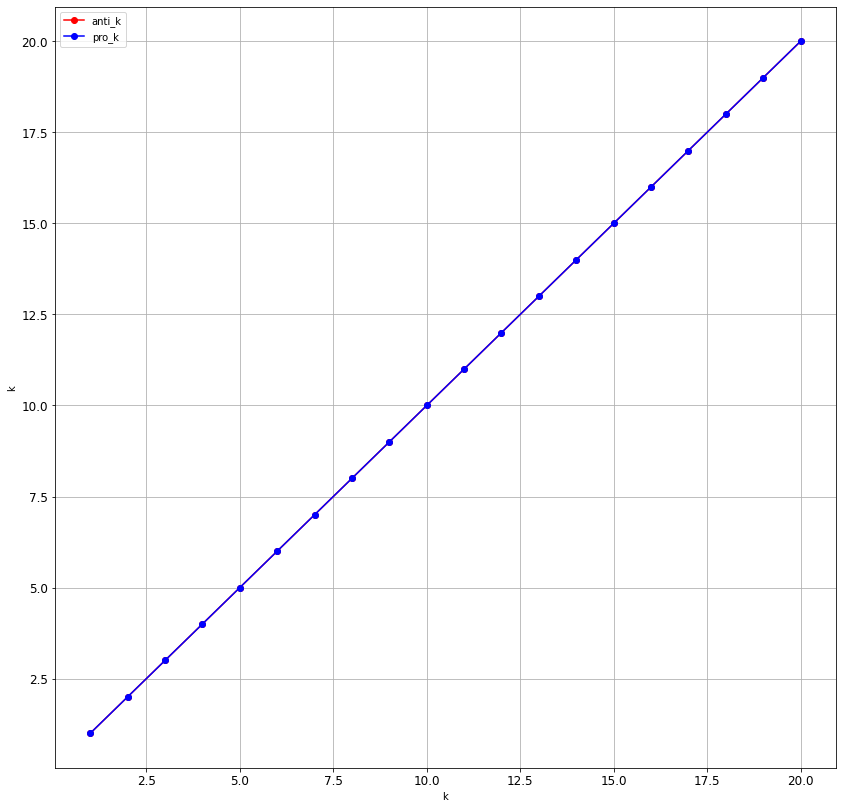

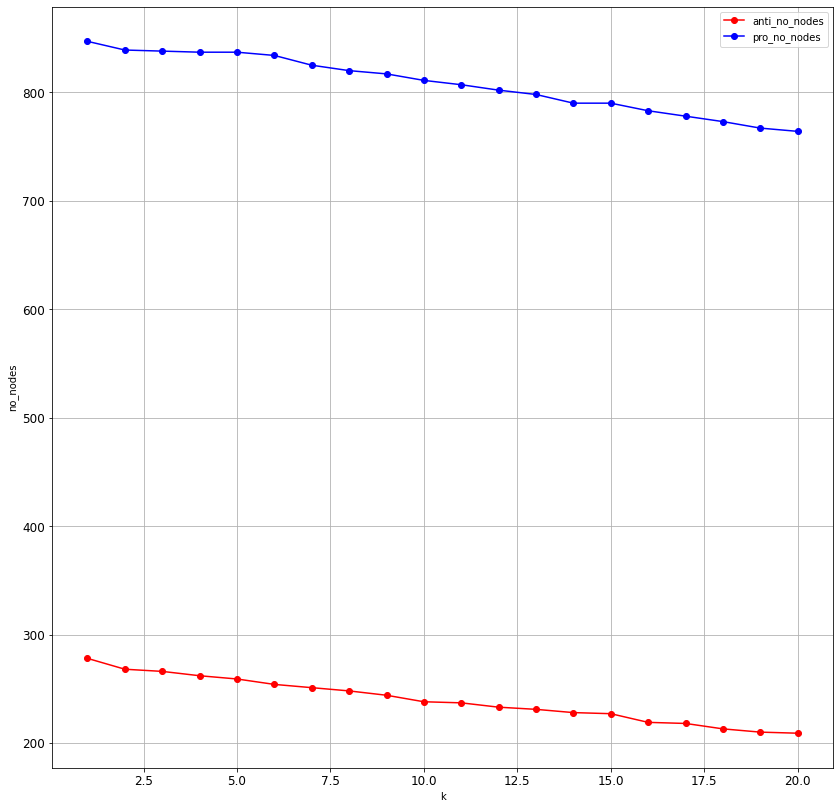

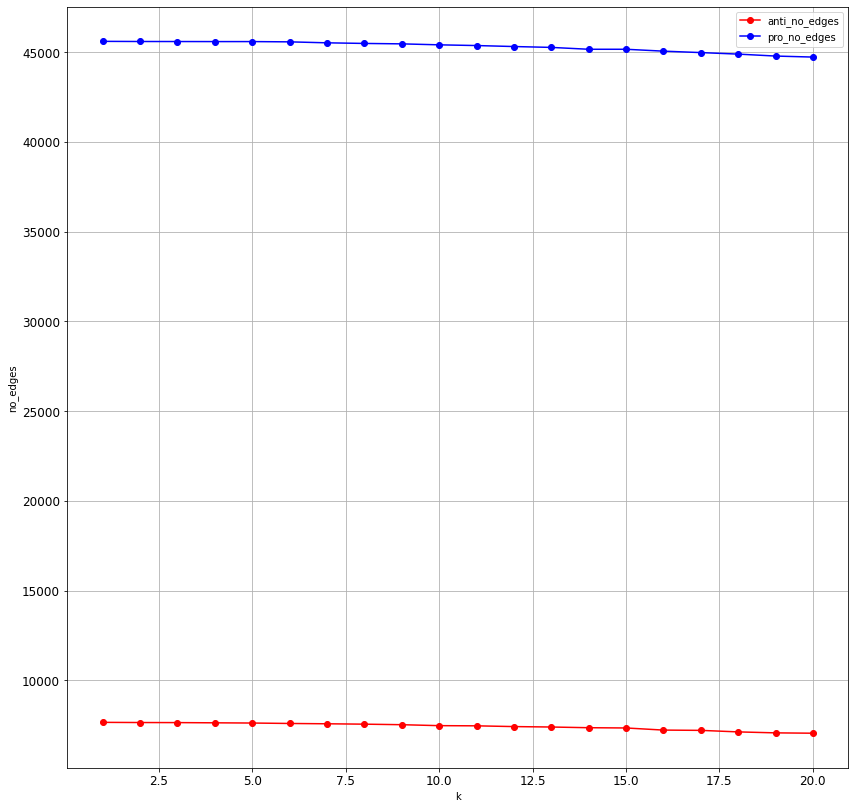

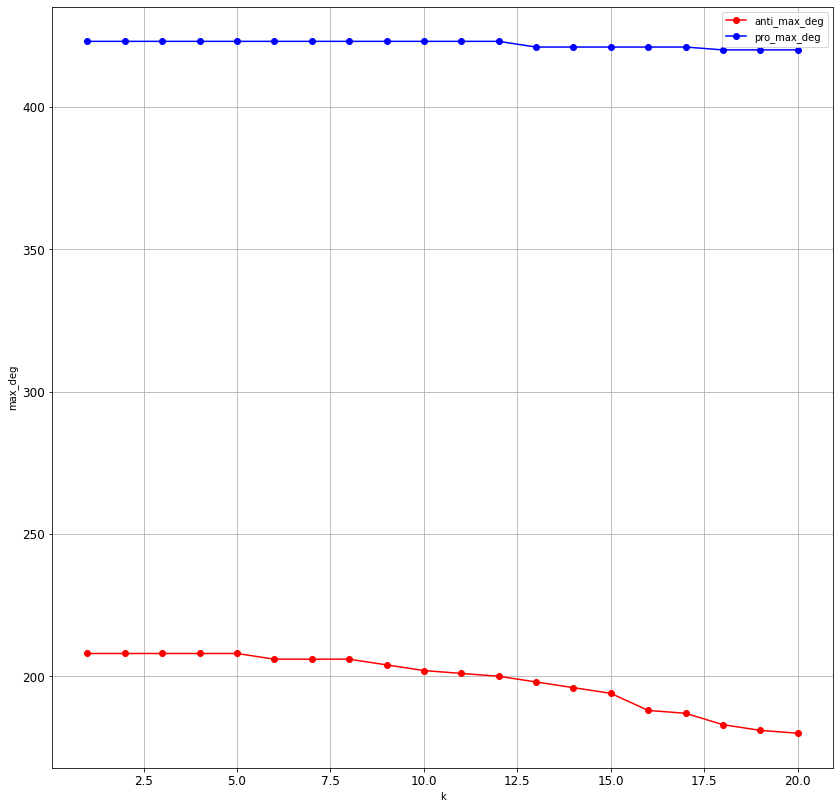

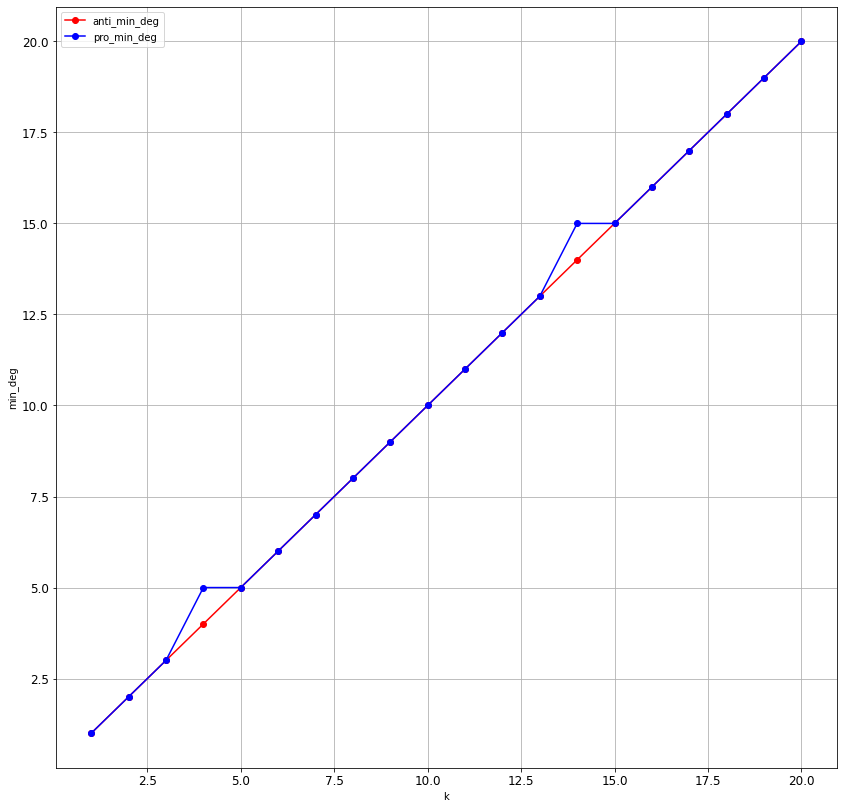

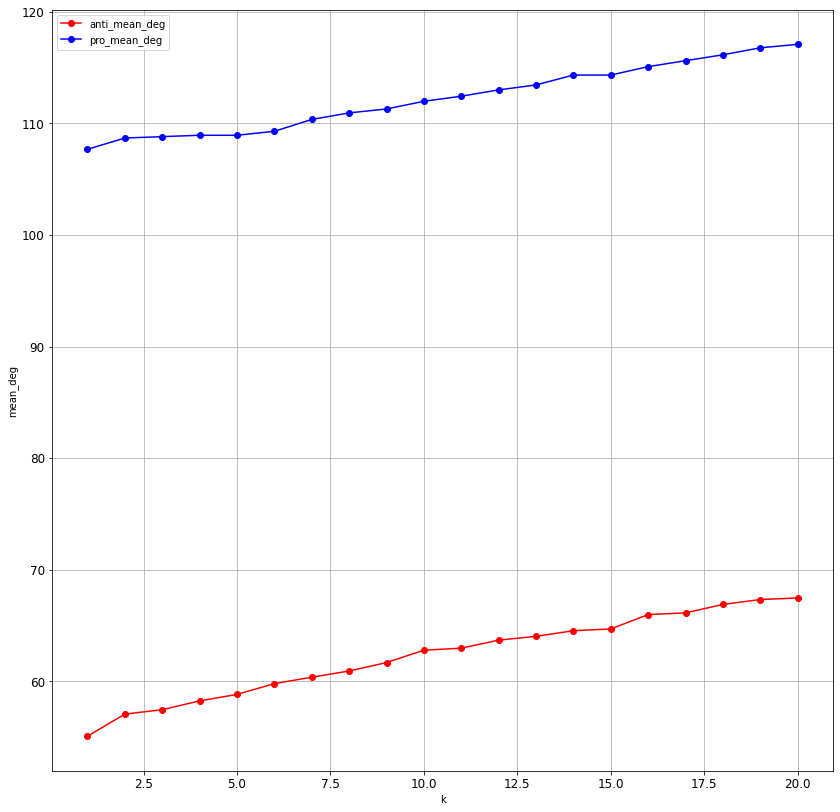

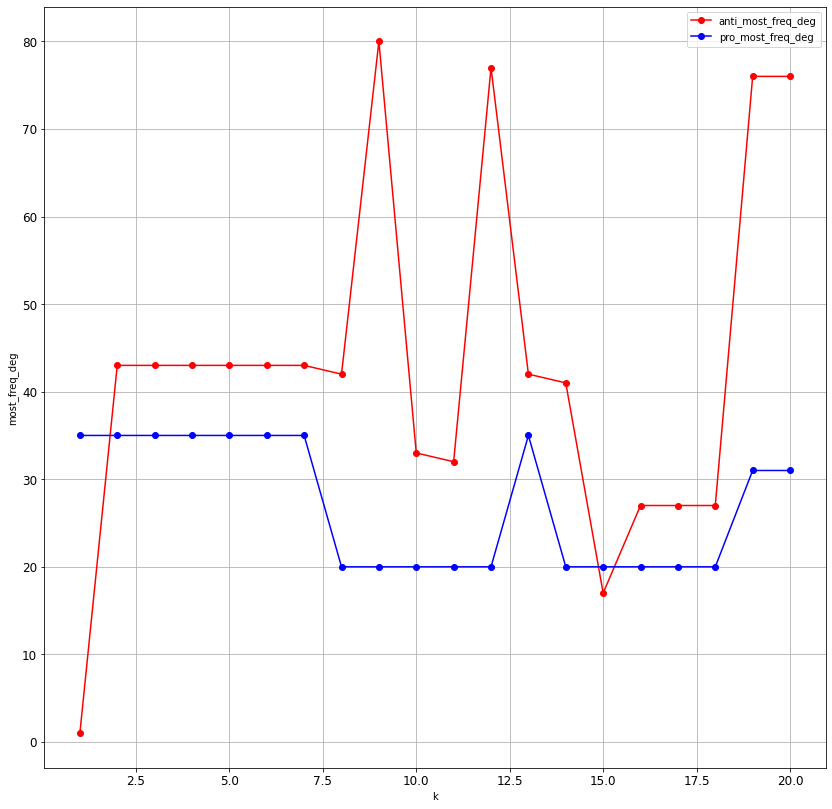

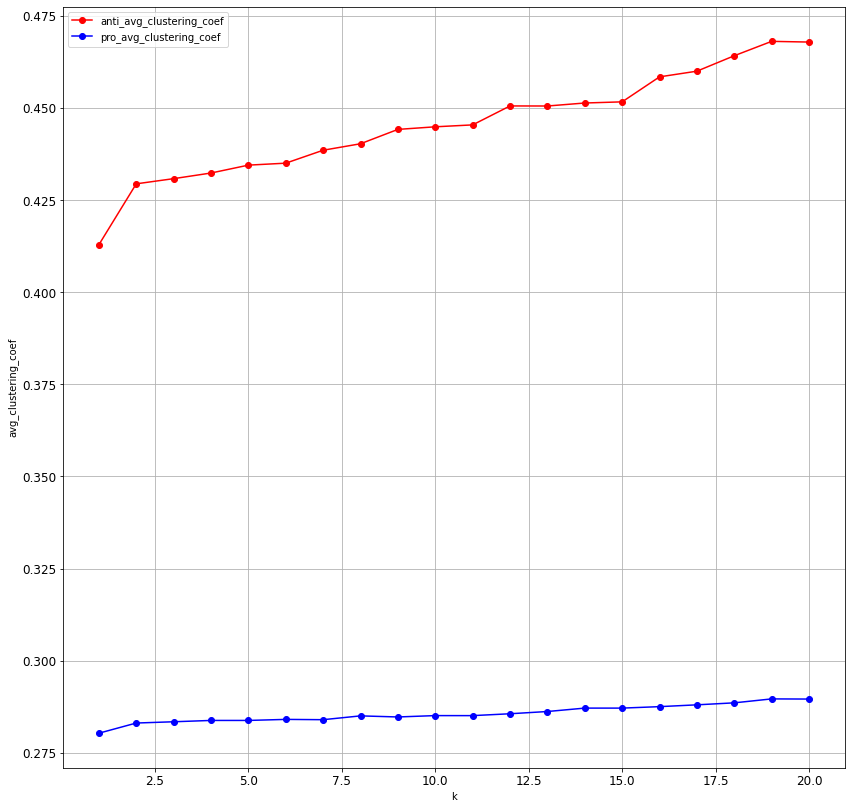

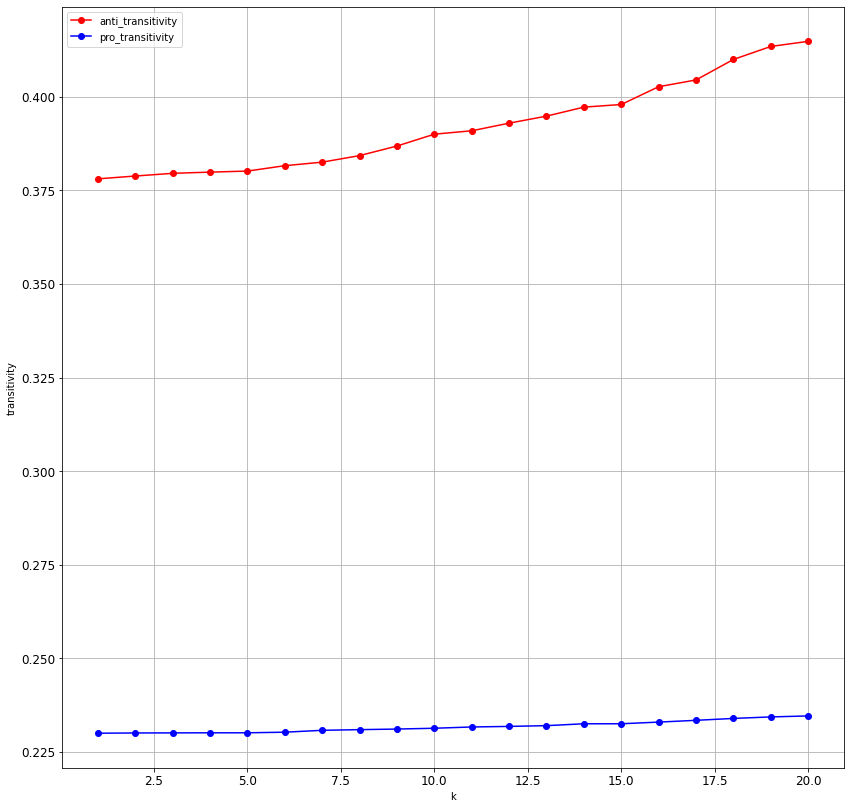

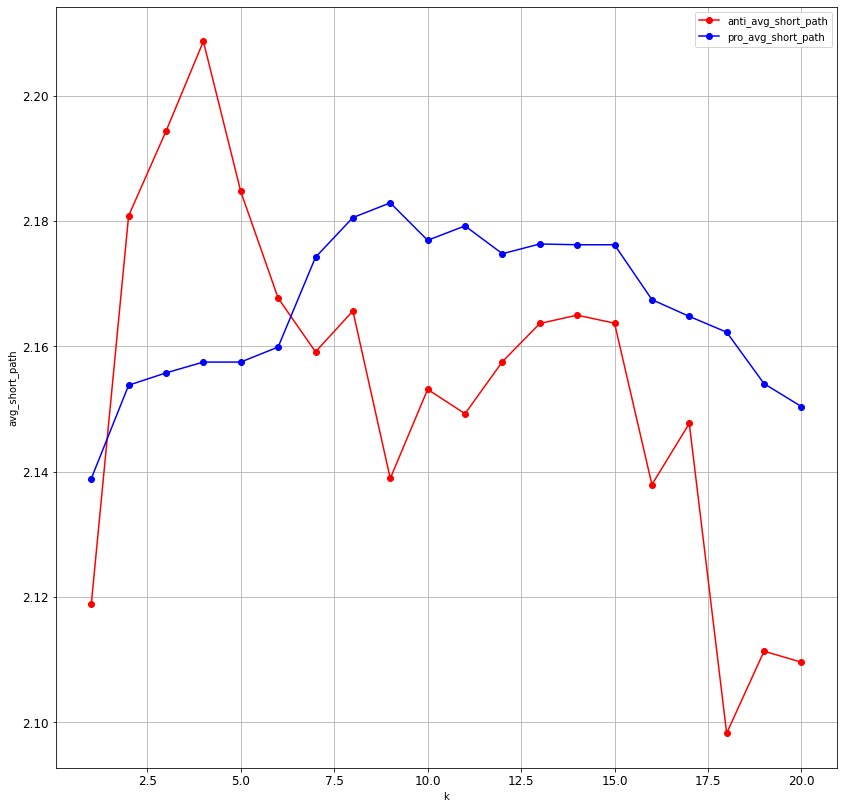

In [65]:
pro_data_3_iter = pd.read_csv(pro_directed_file_3_iter, sep=',')
anti_data_3_iter = pd.read_csv(anti_directed_file_3_iter, sep=',')

for col in cols_directed:
    plot_data(anti_data_3_iter, pro_data_3_iter, col, plots_dir_3_iter)

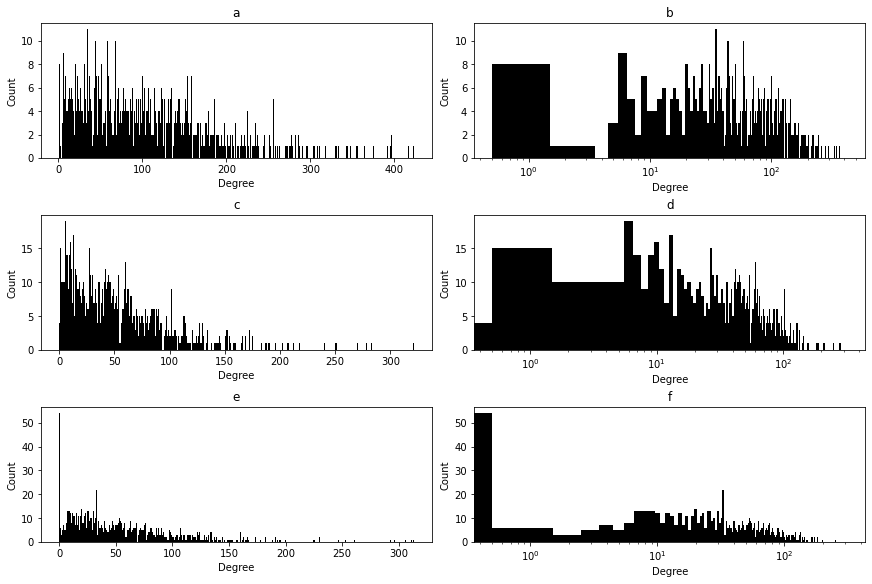

In [36]:
plot_deg_dist(G_pro_hubs_3_iter)

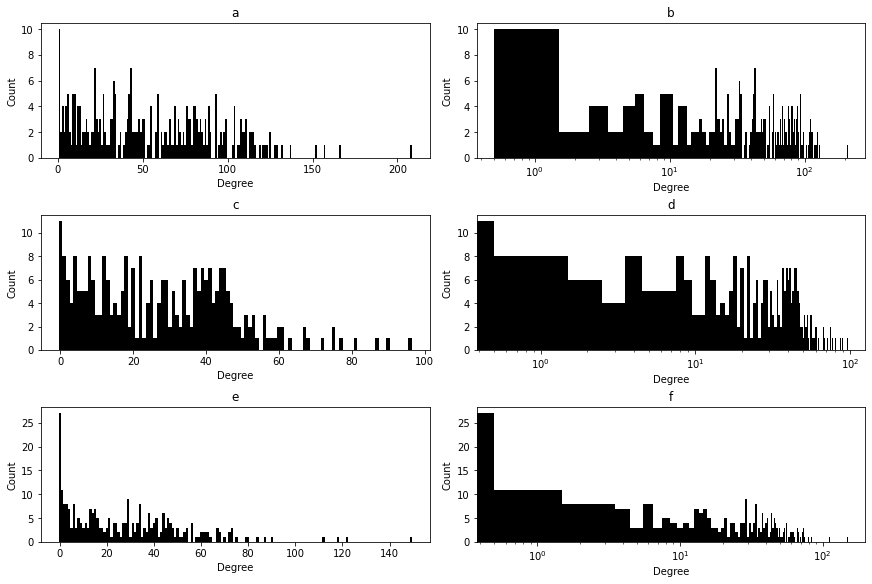

In [37]:
plot_deg_dist(G_anti_hubs_3_iter)

In [39]:
# DENSITY

In [79]:
anti_hubs_dens_2_iter = nx.density(G_anti_hubs_2_iter)
pro_hubs_dens_2_iter = nx.density(G_pro_hubs_2_iter)

print(f'Density for anti hubs network is {anti_hubs_dens_2_iter}')
print(f'Density for pro hubs network is {pro_hubs_dens_2_iter}')

Density for anti hubs network is 0.09727268202856716
Density for pro hubs network is 0.06266064823522036


In [44]:
anti_hubs_dens_3_iter = nx.density(G_anti_hubs_3_iter)
pro_hubs_dens_3_iter = nx.density(G_pro_hubs_3_iter)

print(f'Density for anti hubs network is {anti_hubs_dens_3_iter}')
print(f'Density for pro hubs network is {pro_hubs_dens_3_iter}')

Density for anti hubs network is 0.09940783835025842
Density for pro hubs network is 0.06364278317856654


In [45]:
nx.info(G_anti_hubs_3_iter)

<ipython-input-45-082f1aa62b15>:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G_anti_hubs_3_iter)


'DiGraph with 278 nodes and 7655 edges'

In [39]:
# TOP NEW ACCOUNTS (NOT IN BASE) BASED ON 4 CENTRALITY CENTRALITIES FROM EACH NETWORK

In [40]:
# BASE ACCOUNTS

base_anti_accounts_path_3_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_3\base_anti_hubs'
hand_picked_new_anti_hubs_path_3_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_3\hand_picked_base_anti_hubs'

base_pro_accounts_path_3_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_3\base_pro_hubs'
hand_picked_new_pro_hubs_path_3_iter = r'E:\Twitter_data\AUTOMATED_ITERATION_3\hand_picked_base_pro_hubs'


pro_base_account_names_3_iter = os.listdir(base_pro_accounts_path_3_iter)+ os.listdir(hand_picked_new_pro_hubs_path_3_iter)
pro_base_account_names_3_iter = [re.sub(r'@','', acc) for acc in pro_base_account_names_3_iter]

anti_base_account_names_3_iter = os.listdir(base_anti_accounts_path_3_iter)+ os.listdir(hand_picked_new_anti_hubs_path_3_iter)
anti_base_account_names_3_iter = [re.sub(r'@','', acc) for acc in anti_base_account_names_3_iter]

In [41]:
print(len(pro_base_account_names_3_iter))
print(len(anti_base_account_names_3_iter))

96
179


In [42]:
anti_betweenness_2_iter = analyze_centrality_measures(G_anti_hubs_2_iter, 'betweenness')
anti_degree_2_iter = analyze_centrality_measures(G_anti_hubs_2_iter, 'degree')
anti_closeness_2_iter = analyze_centrality_measures(G_anti_hubs_2_iter, 'closeness')
anti_eigenvector_2_iter = analyze_centrality_measures(G_anti_hubs_2_iter, 'eigenvector')

anti_betweenness_3_iter = analyze_centrality_measures(G_anti_hubs_3_iter, 'betweenness')
anti_degree_3_iter = analyze_centrality_measures(G_anti_hubs_3_iter, 'degree')
anti_closeness_3_iter = analyze_centrality_measures(G_anti_hubs_3_iter, 'closeness')
anti_eigenvector_3_iter = analyze_centrality_measures(G_anti_hubs_3_iter, 'eigenvector')

pro_betweenness_2_iter = analyze_centrality_measures(G_pro_hubs_2_iter, 'betweenness')
pro_degree_2_iter = analyze_centrality_measures(G_pro_hubs_2_iter, 'degree')
pro_closeness_2_iter = analyze_centrality_measures(G_pro_hubs_2_iter, 'closeness')
pro_eigenvector_2_iter = analyze_centrality_measures(G_pro_hubs_2_iter, 'eigenvector')

pro_betweenness_3_iter = analyze_centrality_measures(G_pro_hubs_3_iter, 'betweenness')
pro_degree_3_iter = analyze_centrality_measures(G_pro_hubs_3_iter, 'degree')
pro_closeness_3_iter = analyze_centrality_measures(G_pro_hubs_3_iter, 'closeness')
pro_eigenvector_3_iter = analyze_centrality_measures(G_pro_hubs_3_iter, 'eigenvector')

Processing time: 785926400 ns
Processing time: 0 ns
Processing time: 266318500 ns
Processing time: 101697100 ns
Processing time: 746004600 ns
Processing time: 0 ns
Processing time: 243349700 ns
Processing time: 97738000 ns
Processing time: 14668573800 ns
Processing time: 0 ns
Processing time: 2322997800 ns
Processing time: 256306900 ns
Processing time: 15826359600 ns
Processing time: 1994000 ns
Processing time: 2633954000 ns
Processing time: 277796300 ns


In [56]:
def get_top_accounts(measure_vals, measure_name, amount):
    sorted_vals = sorted(measure_vals.items(), key=itemgetter(1), reverse=True)
    df = pd.DataFrame(columns=['Konto', measure_name])
    for i in range(amount):
        df = df.append({'Konto': sorted_vals[i][0], measure_name: sorted_vals[i][1]}, ignore_index=True)
    return df

In [92]:
top_amount = 100

top_anti_betweenness_2_iter = get_top_accounts(anti_betweenness_2_iter, 'Pośrednictwo', top_amount)
top_anti_betweenness_2_iter = top_anti_betweenness_2_iter.loc[~top_anti_betweenness_2_iter['Konto'].isin(anti_base_account_names_3_iter)].head(15)
top_anti_betweenness_2_iter['Liczba obserwujących'] = top_anti_betweenness_2_iter['Konto'].apply(lambda x: df_anti_hubs_2_iter[df_anti_hubs_2_iter['Source'] == f'{x}']['Source_Follower_Count'].iloc[0])

# top_anti_degree_2_iter = get_top_accounts(anti_degree_2_iter, 'Stopień', top_amount)
# top_anti_degree_2_iter = top_anti_degree_2_iter.loc[~top_anti_degree_2_iter['Konto'].isin(anti_base_account_names_3_iter)].head(15)
# top_anti_degree_2_iter['Liczba obserwujących'] = top_anti_degree_2_iter['Konto'].apply(lambda x: df_anti_hubs_2_iter[df_anti_hubs_2_iter['Source'] == f'{x}']['Source_Follower_Count'].iloc[0])

# top_anti_closeness_2_iter = get_top_accounts(anti_closeness_2_iter, 'Bliskość', top_amount)
# top_anti_closeness_2_iter = top_anti_closeness_2_iter.loc[~top_anti_closeness_2_iter['Konto'].isin(anti_base_account_names_3_iter)].head(15)
# top_anti_closeness_2_iter['Liczba obserwujących'] = top_anti_closeness_2_iter['Konto'].apply(lambda x: df_anti_hubs_2_iter[df_anti_hubs_2_iter['Source'] == f'{x}']['Source_Follower_Count'].iloc[0])

# top_anti_eigenvector_2_iter = get_top_accounts(anti_eigenvector_2_iter, 'Wektor własny', top_amount)
# top_anti_eigenvector_2_iter = top_anti_eigenvector_2_iter.loc[~top_anti_eigenvector_2_iter['Konto'].isin(anti_base_account_names_3_iter)].head(15)
# top_anti_eigenvector_2_iter['Liczba obserwujących'] = top_anti_eigenvector_2_iter['Konto'].apply(lambda x: df_anti_hubs_2_iter[df_anti_hubs_2_iter['Source'] == f'{x}']['Source_Follower_Count'].iloc[0])

top_anti_betweenness_3_iter = get_top_accounts(anti_betweenness_3_iter, 'Pośrednictwo', top_amount)
top_anti_betweenness_3_iter = top_anti_betweenness_3_iter.loc[~top_anti_betweenness_3_iter['Konto'].isin(anti_base_account_names_3_iter)].head(15)
top_anti_betweenness_3_iter['Liczba obserwujących'] = top_anti_betweenness_3_iter['Konto'].apply(lambda x: df_anti_hubs_3_iter[df_anti_hubs_3_iter['Source'] == f'{x}']['Source_Follower_Count'].iloc[0])

# top_anti_degree_3_iter = get_top_accounts(anti_degree_3_iter, 'Stopień', top_amount)
# top_anti_degree_3_iter = top_anti_degree_3_iter.loc[~top_anti_degree_3_iter['Konto'].isin(anti_base_account_names_3_iter)].head(15)
# top_anti_degree_3_iter['Liczba obserwujących'] = top_anti_degree_3_iter['Konto'].apply(lambda x: df_anti_hubs_3_iter[df_anti_hubs_2_iter['Source'] == f'{x}']['Source_Follower_Count'].iloc[0])

# top_anti_closeness_3_iter = get_top_accounts(anti_closeness_3_iter, 'Bliskość', top_amount)
# top_anti_closeness_3_iter = top_anti_closeness_3_iter.loc[~top_anti_closeness_3_iter['Konto'].isin(anti_base_account_names_3_iter)].head(15)
# top_anti_closeness_3_iter['Liczba obserwujących'] = top_anti_closeness_3_iter['Konto'].apply(lambda x: df_anti_hubs_3_iter[df_anti_hubs_2_iter['Source'] == f'{x}']['Source_Follower_Count'].iloc[0])

# top_anti_eigenvector_3_iter = get_top_accounts(anti_eigenvector_3_iter, 'Wektor własny', top_amount)
# top_anti_eigenvector_3_iter = top_anti_eigenvector_3_iter.loc[~top_anti_eigenvector_3_iter['Konto'].isin(anti_base_account_names_3_iter)].head(15)
# top_anti_eigenvector_3_iter['Liczba obserwujących'] = top_anti_eigenvector_3_iter['Konto'].apply(lambda x: df_anti_hubs_3_iter[df_anti_hubs_2_iter['Source'] == f'{x}']['Source_Follower_Count'].iloc[0])

top_pro_betweenness_2_iter = get_top_accounts(pro_betweenness_2_iter, 'Pośrednictwo', top_amount)
top_pro_betweenness_2_iter = top_pro_betweenness_2_iter.loc[~top_pro_betweenness_2_iter['Konto'].isin(pro_base_account_names_3_iter)].head(15)
top_pro_betweenness_2_iter['Liczba obserwujących'] = top_pro_betweenness_2_iter['Konto'].apply(lambda x: df_pro_hubs_2_iter[df_pro_hubs_2_iter['Source'] == f'{x}']['Source_Follower_Count'].iloc[0])

# top_pro_degree_2_iter = get_top_accounts(pro_degree_2_iter, 'Stopień', top_amount)
# top_pro_degree_2_iter = top_pro_degree_2_iter.loc[~top_pro_degree_2_iter['Konto'].isin(pro_base_account_names_3_iter)].head(15)
# top_pro_degree_2_iter['Liczba obserwujących'] = top_pro_degree_2_iter['Konto'].apply(lambda x: df_pro_hubs_2_iter[df_pro_hubs_2_iter['Source'] == f'{x}']['Source_Follower_Count'].iloc[0])

# top_pro_closeness_2_iter = get_top_accounts(pro_closeness_2_iter, 'Bliskość', top_amount)
# top_pro_closeness_2_iter = top_pro_closeness_2_iter.loc[~top_pro_closeness_2_iter['Konto'].isin(pro_base_account_names_3_iter)].head(15)
# top_pro_closeness_2_iter['Liczba obserwujących'] = top_pro_closeness_2_iter['Konto'].apply(lambda x: df_pro_hubs_2_iter[df_pro_hubs_2_iter['Source'] == f'{x}']['Source_Follower_Count'].iloc[0])

# top_pro_eigenvector_2_iter = get_top_accounts(pro_eigenvector_2_iter, 'Wektor własny', top_amount)
# top_pro_eigenvector_2_iter = top_pro_eigenvector_2_iter.loc[~top_pro_eigenvector_2_iter['Konto'].isin(pro_base_account_names_3_iter)].head(15)
# top_pro_eigenvector_2_iter['Liczba obserwujących'] = top_pro_eigenvector_2_iter['Konto'].apply(lambda x: df_pro_hubs_2_iter[df_pro_hubs_2_iter['Source'] == f'{x}']['Source_Follower_Count'].iloc[0])

top_pro_betweenness_3_iter = get_top_accounts(pro_betweenness_3_iter, 'Pośrednictwo', top_amount)
top_pro_betweenness_3_iter = top_pro_betweenness_3_iter.loc[~top_pro_betweenness_3_iter['Konto'].isin(pro_base_account_names_3_iter)].head(15)
top_pro_betweenness_3_iter['Liczba obserwujących'] = top_pro_betweenness_3_iter['Konto'].apply(lambda x: df_pro_hubs_3_iter[df_pro_hubs_3_iter['Source'] == f'{x}']['Source_Follower_Count'].iloc[0])

# top_pro_degree_3_iter = get_top_accounts(pro_degree_3_iter, 'Stopień', top_amount)
# top_pro_degree_3_iter = top_pro_degree_3_iter.loc[~top_pro_degree_3_iter['Konto'].isin(pro_base_account_names_3_iter)].head(15)
# top_pro_degree_3_iter['Liczba obserwujących'] = top_pro_degree_3_iter['Konto'].apply(lambda x: df_pro_hubs_3_iter[df_pro_hubs_3_iter['Source'] == f'{x}']['Source_Follower_Count'].iloc[0])

# top_pro_closeness_3_iter = get_top_accounts(pro_closeness_3_iter, 'Bliskość', top_amount)
# top_pro_closeness_3_iter = top_pro_closeness_3_iter.loc[~top_pro_closeness_3_iter['Konto'].isin(pro_base_account_names_3_iter)].head(15)
# top_pro_closeness_3_iter['Liczba obserwujących'] = top_pro_closeness_3_iter['Konto'].apply(lambda x: df_pro_hubs_3_iter[df_pro_hubs_3_iter['Source'] == f'{x}']['Source_Follower_Count'].iloc[0])

# top_pro_eigenvector_3_iter = get_top_accounts(pro_eigenvector_3_iter, 'Wektor własny', top_amount)
# top_pro_eigenvector_3_iter = top_pro_eigenvector_3_iter.loc[~top_pro_eigenvector_3_iter['Konto'].isin(pro_base_account_names_3_iter)].head(15)
# top_pro_eigenvector_3_iter['Liczba obserwujących'] = top_pro_eigenvector_3_iter['Konto'].apply(lambda x: df_pro_hubs_3_iter[df_pro_hubs_3_iter['Source'] == f'{x}']['Source_Follower_Count'].iloc[0])

In [93]:
top_anti_betweenness_2_iter

,Konto,Pośrednictwo,Liczba obserwujących
5,ZubyMusic,0.030764,707971
10,drdavidsamadi,0.020401,381043
16,JimDeMint,0.016731,192142
19,BretWeinstein,0.016050,688119
21,FatEmperor,0.015307,151552
22,DonaldJTrumpJr,0.015151,7479067
23,laralogan,0.014953,242291
25,TheFreds,0.014452,128051
27,kksheld,0.013596,117953
29,ThomasEWoods,0.012477,135248


In [94]:
top_anti_betweenness_3_iter

,Konto,Pośrednictwo,Liczba obserwujących
8,HarvardHealth,0.023395,2555002
9,DrEliDavid,0.022931,187058
12,kksheld,0.017052,124125
15,Lukewearechange,0.016116,307741
17,drdavidsamadi,0.015903,388501
21,FatEmperor,0.014697,151865
23,kylenabecker,0.014513,234474
26,CDCDirector,0.013899,372023
27,ThomasEWoods,0.013061,141242
29,JimDeMint,0.012746,192171


In [95]:
top_pro_betweenness_2_iter

,Konto,Pośrednictwo,Liczba obserwujących
0,DrJenGunter,0.017888,361477.0
1,fmanjoo,0.015821,195268.0
2,baratunde,0.015355,266360.0
4,jburnmurdoch,0.012930,449496.0
5,stevesilberman,0.012668,140207.0
7,statnews,0.012433,164113.0
10,timoreilly,0.010504,1698193.0
12,primalpoly,0.010384,118467.0
13,balajis,0.010350,631587.0
15,clairlemon,0.010123,232022.0


In [96]:
top_pro_betweenness_3_iter

,Konto,Pośrednictwo,Liczba obserwujących
0,DrEricDing,0.017569,724691.0
1,DrJenGunter,0.015960,363045.0
2,baratunde,0.013551,264741.0
4,stevesilberman,0.012255,140572.0
5,antoniogm,0.011877,127563.0
7,jburnmurdoch,0.011334,448247.0
9,primalpoly,0.010866,121240.0
11,timoreilly,0.010406,1695793.0
14,statnews,0.009683,165008.0
15,mattwridley,0.009644,114504.0


In [6]:
list1 = ['ZubyMusic', 'drdavidsamadi', 'JimDeMint', 'BretWeinstein', 'FatEmperor', 'DonaldJTrumpJr', 'laralogan', 'TheFreds', 
         'kksheld','ThomasEWoods', 'kylenabecker', 'RepThomasMassie', 'MartinKulldorff', 'RandPaul', 'zoeharcombe']

list2 = ['HarvardHealth', 'DrEliDavid', 'kksheld', 'Lukewearechange', 'drdavidsamadi', 'FatEmperor', 'kylenabecker', 
         'CDCDirector', 'ThomasEWoods', 'JimDeMint', 'laralogan', 'MdBreathe', 'TheFredsm', 'LionelMedia', 'Liz_Wheeler']

list3 = ['DrJenGunter', 'fmanjoo', 'baratunde', 'jburnmurdoch', 'stevesilberman', 'statnews', 'timoreilly', 'primalpoly', 
         'balajis', 'clairlemon', 'Nature', 'guardianscience', 'MaxCRoser', 'mattwridley', 'ezraklein']

list4 = ['DrEricDing', 'DrJenGunter', 'baratunde', 'stevesilberman', 'antoniogm', 'jburnmurdoch', 'primalpoly', 'timoreilly', 
         'statnews', 'mattwridley', 'balajis', 'Nature', 'gregggonsalves', 'MaxCRoser', 'guardianscience']

In [11]:
len(set(list3).intersection(set(list4)))

12

In [ ]:
# COMMUNITIES DETECTION

In [38]:
def most_valuable_edge(G):
    centrality = edge_betweenness_centrality(G)
    max_cent = max(centrality.values())
    # Scale the centrality values so they are between 0 and 1,
    # and add some random noise.
    centrality = {e: c / max_cent for e, c in centrality.items()}
    # Add some random noise.
    centrality = {e: c + random() for e, c in centrality.items()}
    return max(centrality, key=centrality.get)

def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos


def set_node_community(G, communities):
    for c, v_c in enumerate(communities):
        for v in v_c:
                # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1
            
def set_edge_community(G):
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0
            
def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)


def get_communities_pos(communities, G):

    gn_dict_communities = {}

    for i, c in enumerate(communities):
        print ("Community {}".format(i))
        for node in c:
            gn_dict_communities[node] = i + 1

    for node in G:
        if node not in gn_dict_communities.keys():
            gn_dict_communities[node] = -1

    gn_pos = community_layout(G, gn_dict_communities)

    gn_colors = []
    for node in G.nodes:
        gn_colors.append(cm.Set1(gn_dict_communities[node]))
    
    return gn_pos, gn_colors

In [49]:
# I METHOD ANTI

anti_gn_generator_1 = girvan_newman(G_anti_hubs_3_iter, most_valuable_edge)
anti_gn_communities_1 = next(islice(anti_gn_generator_1, 3, None))
print(f'Detected {len(anti_gn_communities_1)} communities')
anti_gn_pos_1, anti_gn_colors_1 = get_communities_pos(anti_gn_communities_1, G_anti_hubs_3_iter)

Detected 5 communities
Community 0
Community 1
Community 2
Community 3
Community 4


In [50]:
anti_gn_communities_1

({'2LarryJohnson7',
  '5GAwarenessNow',
  '5GDangers',
  '5gAwareness',
  '82jsmith',
  'AGHamilton29',
  'AdamBaldwin',
  'AleaMilham',
  'AlpacaAurelius',
  'AmberNMarchese',
  'AmyMek',
  'Anastas32451695',
  'AncestralApoth',
  'AnitaLea1',
  'AnnleeElisha',
  'Astroidhalo774',
  'BeMoreBeNow',
  'BernieSpofforth',
  'BioLayne',
  'BlissTabitha',
  'BrentBozell',
  'BuckSexton',
  'CAchemtrails',
  'CDCDirector',
  'CDCgov',
  'CHEMTRAILSMN',
  'CaliVaxChoice',
  'Canoe_Glider',
  'CarlDevitt',
  'Cernovich',
  'ChemtrailsNews',
  'Chemtrails_Uk',
  'ChildrensHD',
  'ChrisLoesch',
  'ChristinaPushaw',
  'CollChris',
  'Coronavirusgoo1',
  'DSL1912',
  'DanCrenshawTX',
  'DanielKlatt',
  'DavidLimbaugh',
  'DavidWolfe',
  'DeepLifeQuotes',
  'DinosaurEarth',
  'DrAmalinaBakri',
  'DrAseemMalhotra',
  'DrButtar',
  'DrChrisNorthrup',
  'DrEddyClinic',
  'DrEliDavid',
  'DrJBhattacharya',
  'DrJudyAMikovits',
  'DrMartyFox',
  'DrWeil',
  'Dr_Berglund',
  'DuncanBannatyne',
  'EMFRebe

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (20, 20)})

nx.draw_networkx_nodes(G_anti_hubs, anti_gn_pos_1, node_color=anti_gn_colors_1, node_size=50)
nx.draw_networkx_edges(G_anti_hubs, anti_gn_pos_1, alpha=0.05)
nx.draw_networkx_labels(G_anti_hubs, anti_gn_pos_1, font_size=7, alpha = 0.5)

plt.axis('off')
plt.show()

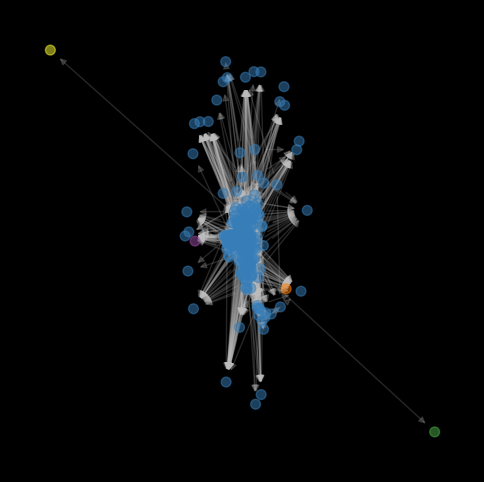

In [52]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (6, 6)})
plt.style.use('dark_background')

nx.draw_networkx_nodes(G_anti_hubs_3_iter, anti_gn_pos_1, node_color=anti_gn_colors_1, node_size=50, alpha=0.5)
nx.draw_networkx_edges(G_anti_hubs_3_iter, anti_gn_pos_1, edge_color='silver', alpha=0.2)

plt.axis('off')
plt.show()

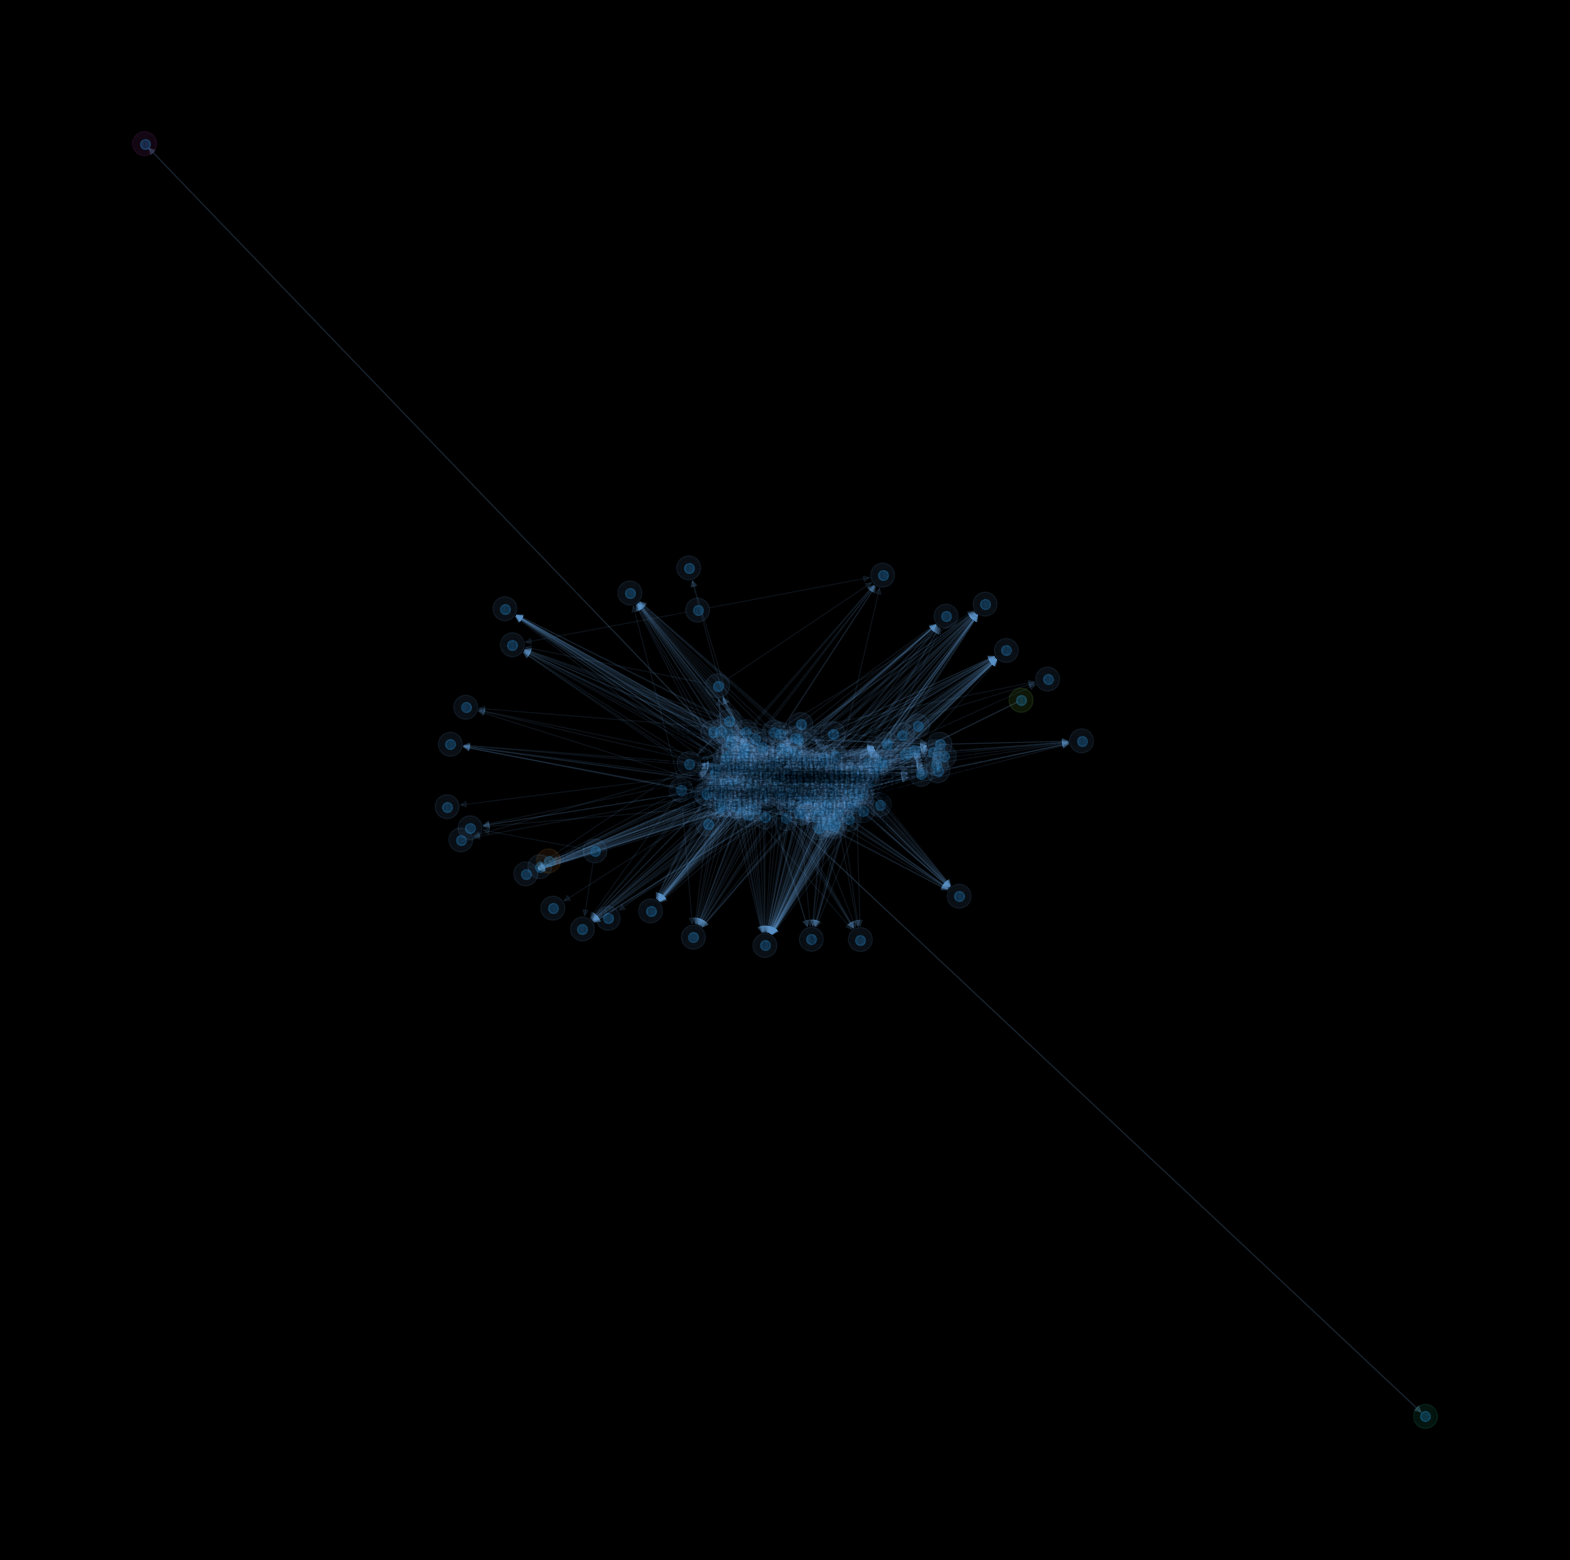

In [46]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (20, 20)})
plt.style.use('dark_background')

set_node_community(G_anti_hubs_2_iter, anti_gn_communities_1)
set_edge_community(G_anti_hubs_2_iter)

node_color = [get_color(G_anti_hubs_2_iter.nodes[v]['community']) for v in G_anti_hubs_2_iter.nodes]

external = [(v, w) for v, w in G_anti_hubs_2_iter.edges if G_anti_hubs_2_iter.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_anti_hubs_2_iter.edges if G_anti_hubs_2_iter.edges[v, w]['community'] > 0]
internal_color = [get_color(G_anti_hubs_2_iter.edges[e]['community']) for e in internal]
external_color = [get_color(G_anti_hubs_2_iter.edges[e]['community']) for e in external]

# Draw external edges
nx.draw_networkx(G_anti_hubs_2_iter, pos=anti_gn_pos_1, node_size=50, edgelist=external, edge_color=external_color, alpha=0.2, with_labels=False)
# Draw nodes and internal edges
nx.draw_networkx(G_anti_hubs_2_iter, pos=anti_gn_pos_1, node_color=node_color, edgelist=internal, edge_color=internal_color, alpha=0.05)

plt.axis('off')
plt.show()

In [ ]:
# II METHOD ANTI

anti_gn_generator_2 = nxcom.girvan_newman(G_anti_hubs)
anti_gn_communities_2 = next(anti_gn_generator_2)
print(f'Detected {len(anti_gn_communities_2)} communities')
anti_gn_pos_2, anti_gn_colors_2 = get_communities_pos(anti_gn_communities_2, G_anti_hubs)

In [ ]:
anti_gn_communities_2

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (20, 20)})

nx.draw_networkx_nodes(G_anti_hubs, anti_gn_pos_2, node_color=anti_gn_colors_2, node_size=50)
nx.draw_networkx_edges(G_anti_hubs, anti_gn_pos_2, alpha=0.05)
nx.draw_networkx_labels(G_anti_hubs, anti_gn_pos_2, font_size=7, alpha = 0.5)

plt.axis('off')
plt.show()

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (20, 20)})
plt.style.use('dark_background')

nx.draw_networkx_nodes(G_anti_hubs, anti_gn_pos_2, node_color=anti_gn_colors_2, node_size=50, alpha=0.5)
nx.draw_networkx_edges(G_anti_hubs, anti_gn_pos_2, edge_color='silver', alpha=0.2)

plt.axis('off')
plt.show()

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (20, 20)})
plt.style.use('dark_background')

set_node_community(G_anti_hubs, anti_gn_communities_2)
set_edge_community(G_anti_hubs)

node_color = [get_color(G_anti_hubs.nodes[v]['community']) for v in G_anti_hubs.nodes]

external = [(v, w) for v, w in G_anti_hubs.edges if G_anti_hubs.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_anti_hubs.edges if G_anti_hubs.edges[v, w]['community'] > 0]
internal_color = [get_color(G_anti_hubs.edges[e]['community']) for e in internal]
external_color = [get_color(G_anti_hubs.edges[e]['community']) for e in external]

# Draw external edges
nx.draw_networkx(G_anti_hubs, pos=anti_gn_pos_2, node_size=50, edgelist=external, edge_color=external_color, alpha=0.2, with_labels=False)
# Draw nodes and internal edges
nx.draw_networkx(G_anti_hubs, pos=anti_gn_pos_2, node_size=50, node_color=node_color, edgelist=internal, edge_color=internal_color, alpha=0.5, with_labels=False)

In [ ]:
# III METHOD ANTI (UNDIRECTED GRAPH)

anti_gn_generator_3 = girvan_newman(G_anti_hubs_undirected, most_valuable_edge)
anti_gn_communities_3 = next(islice(anti_gn_generator_3, 3, None))
print(f'Detected {len(anti_gn_communities_3)} communities')
anti_gn_pos_3, anti_gn_colors_3 = get_communities_pos(anti_gn_communities_3, G_anti_hubs)

In [ ]:
anti_gn_communities_3

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (20, 20)})

nx.draw_networkx_nodes(G_anti_hubs_undirected, anti_gn_pos_3, node_color=anti_gn_colors_3, node_size=50)
nx.draw_networkx_edges(G_anti_hubs_undirected, anti_gn_pos_3, alpha=0.05)
#nx.draw_networkx_labels(G_anti_hubs_undirected, gn_pos, font_size=7, alpha = 0.5)

plt.axis('off')
plt.show()

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (20, 20)})
plt.style.use('dark_background')

nx.draw_networkx_nodes(G_anti_hubs_undirected, anti_gn_pos_3, node_color=anti_gn_colors_3, node_size=50, alpha=0.5)
nx.draw_networkx_edges(G_anti_hubs_undirected, anti_gn_pos_3, edge_color='silver', alpha=0.2)

plt.axis('off')
plt.show()

In [42]:
# I METHOD PRO

pro_gn_generator_1 = girvan_newman(G_pro_hubs_3_iter, most_valuable_edge)
pro_gn_communities_1 = next(islice(pro_gn_generator_1, 3, None))
print(f'Detected {len(pro_gn_communities_1)} communities')
pro_gn_pos_1, pro_gn_colors_1 = get_communities_pos(pro_gn_communities_1, G_pro_hubs_3_iter)

Detected 5 communities
Community 0
Community 1
Community 2
Community 3
Community 4


In [43]:
pro_gn_communities_1

({'1book140',
  '2020science',
  '3blue1brown',
  'ASlavitt',
  'AbdulElSayed',
  'AcademicChatter',
  'AdamRutherford',
  'AdamSerwer',
  'AdamSessler',
  'AdrianEdmondson',
  'AkiAnastasiou',
  'AlanWattsDaily',
  'AlbertEinstein',
  'AllisonPearson',
  'Alt_NASA',
  'AmyMainzer',
  'AndrewMarr9',
  'AndrewMayne',
  'AndyBoxall',
  'Anjyoun',
  'ApostropheBooks',
  'Astro2fish',
  'AstroKatie',
  'AstroVicGlover',
  'Astro_Cady',
  'Astro_Mike',
  'AstronautAbby',
  'AstronomyMag',
  'AtifRMian',
  'Atul_Gawande',
  'AudieCornish',
  'Austan_Goolsbee',
  'Austen',
  'BBCScienceNews',
  'BBC_Future',
  'BCAppelbaum',
  'BGI_Genomics',
  'BadAstronomer',
  'BallouxFrancois',
  'BarryJenkins',
  'BeckyQuick',
  'BeeBrookshire',
  'BellaLack',
  'BenjySarlin',
  'BillGates',
  'BillNye',
  'Bill_Gross',
  'BjornLomborg',
  'Bob_Wachter',
  'BogochIsaac',
  'BornFitness',
  'Botanygeek',
  'BradBirdA113',
  'BretWeinstein',
  'BrianRoemmele',
  'CBSHealth',
  'CDisillusion',
  'CHSommers'

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (20, 20)})

nx.draw_networkx_nodes(G_pro_hubs, pro_gn_pos_1, node_color=pro_gn_colors_1, node_size=50)
nx.draw_networkx_edges(G_pro_hubs, pro_gn_pos_1, alpha=0.05)
nx.draw_networkx_labels(G_pro_hubs, pro_gn_pos_1, font_size=7, alpha = 0.5)

plt.axis('off')
plt.show()

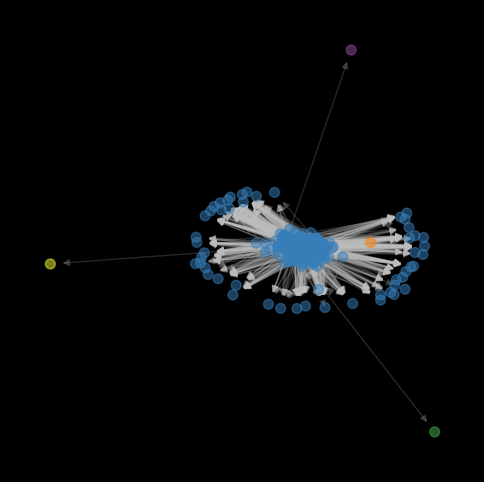

In [44]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (6, 6)})
plt.style.use('dark_background')

nx.draw_networkx_nodes(G_pro_hubs_3_iter, pro_gn_pos_1, node_color=pro_gn_colors_1, node_size=50, alpha=0.5)
nx.draw_networkx_edges(G_pro_hubs_3_iter, pro_gn_pos_1, edge_color='silver', alpha=0.2)

plt.axis('off')
plt.show()

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (20, 20)})
plt.style.use('dark_background')

set_node_community(G_pro_hubs, pro_gn_communities_1)
set_edge_community(G_pro_hubs)

node_color = [get_color(G_pro_hubs.nodes[v]['community']) for v in G_pro_hubs.nodes]

external = [(v, w) for v, w in G_pro_hubs.edges if G_pro_hubs.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_pro_hubs.edges if G_pro_hubs.edges[v, w]['community'] > 0]
internal_color = [get_color(G_pro_hubs.edges[e]['community']) for e in internal]
external_color = [get_color(G_pro_hubs.edges[e]['community']) for e in external]

# Draw external edges
nx.draw_networkx(G_pro_hubs, pos=pro_gn_pos_1, node_size=50, edgelist=external, edge_color=external_color, alpha=0.2, with_labels=False)
# Draw nodes and internal edges
nx.draw_networkx(G_pro_hubs, pos=pro_gn_pos_1, node_color=node_color, edgelist=internal, edge_color=internal_color, alpha=0.05)

In [ ]:
# II METHOD PRO

pro_gn_generator_2 = nxcom.girvan_newman(G_pro_hubs)
pro_gn_communities_2 = next(pro_gn_generator_2)
print(f'Detected {len(pro_gn_communities_2)} communities')
pro_gn_pos_2, pro_gn_colors_2 = get_communities_pos(pro_gn_communities_2, G_pro_hubs)

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (20, 20)})

nx.draw_networkx_nodes(G_pro_hubs, pro_gn_pos_2, node_color=pro_gn_colors_2, node_size=50)
nx.draw_networkx_edges(G_pro_hubs, pro_gn_pos_2, alpha=0.05)
nx.draw_networkx_labels(G_pro_hubs, pro_gn_pos_2, font_size=7, alpha = 0.5)

plt.axis('off')
plt.show()

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (20, 20)})
plt.style.use('dark_background')

nx.draw_networkx_nodes(G_pro_hubs, pro_gn_pos_2, node_color=pro_gn_colors_2, node_size=50, alpha=0.5)
nx.draw_networkx_edges(G_pro_hubs, pro_gn_pos_2, edge_color='silver', alpha=0.2)

plt.axis('off')
plt.show()

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (20, 20)})
plt.style.use('dark_background')

set_node_community(G_pro_hubs, pro_gn_communities_2)
set_edge_community(G_pro_hubs)

node_color = [get_color(G_pro_hubs.nodes[v]['community']) for v in G_pro_hubs.nodes]

external = [(v, w) for v, w in G_pro_hubs.edges if G_pro_hubs.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_pro_hubs.edges if G_pro_hubs.edges[v, w]['community'] > 0]
internal_color = [get_color(G_pro_hubs.edges[e]['community']) for e in internal]
external_color = [get_color(G_pro_hubs.edges[e]['community']) for e in external]

# Draw external edges
nx.draw_networkx(G_pro_hubs, pos=pro_gn_pos_2, node_size=50, edgelist=external, edge_color=external_color, alpha=0.2, with_labels=False)
# Draw nodes and internal edges
nx.draw_networkx(G_pro_hubs, pos=pro_gn_pos_2, node_color=node_color, edgelist=internal, edge_color=internal_color, alpha=0.05)

In [ ]:
# DISTRIBUTION PLOT WITH NUMBER OF FOLLOWERS VS NODE DEGREE 

In [90]:
def plot_followers_number_distribution_per_node(graph1, graph2, df1, df2):
    
    grouped_1_nodes = defaultdict(list)
    grouped_2_nodes = defaultdict(list)

    for node_name, degree in sorted(graph1.degree, key=lambda x: x[1], reverse=True):
        grouped_1_nodes[degree].append(node_name)

    for node_name, degree in sorted(graph2.degree, key=lambda x: x[1], reverse=True):
        grouped_2_nodes[degree].append(node_name)


    grouped_1_followers_values_nodes = defaultdict(list)
    grouped_2_followers_values_nodes = defaultdict(list)

    for k,v in grouped_1_nodes.items():
        for i in v:
            try:
                grouped_1_followers_values_nodes[k].append(df1[df1['Source']==i]['Source_Follower_Count'].iloc[0])
            except:
                continue

    for k,v in grouped_2_nodes.items():
        for i in v:
            try:
                grouped_2_followers_values_nodes[k].append(df2[df2['Source']==i]['Source_Follower_Count'].iloc[0])
            except:
                continue
                
    # PLOT
    plt.figure(figsize=(6, 6))

    for index, (k, v) in enumerate(grouped_1_followers_values_nodes.items()):
        for index2, i in enumerate(v):
            if index == 0 and index2 == 0:
                plt.scatter(k, i, color='blue', s=20, marker="o", label='I iteration')
            else:
                plt.scatter(k, i, color='blue', s=20, marker="o")

    for index, (k, v) in enumerate(grouped_2_followers_values_nodes.items()):
        for index2, i in enumerate(v):
            if index == 0 and index2 == 0:
                plt.scatter(k, i, color='navy', s=20, marker="s",  label='II iteration')
            else:
                plt.scatter(k, i, color='navy', s=20, marker="s")

    #plt.title('Number of followers vs node degree distribution')
    plt.xlabel('Node degree', fontsize=12)
    plt.ylabel('Followers number', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.yscale('log')
    plt.legend(fontsize=12)
    plt.show()

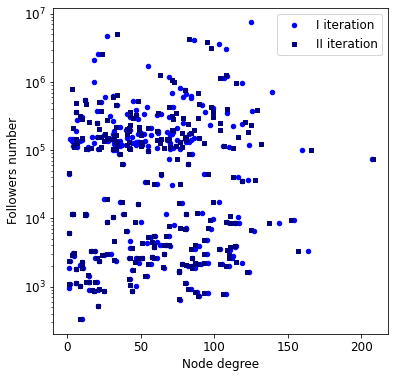

In [91]:
plot_followers_number_distribution_per_node(G_anti_hubs_2_iter, G_anti_hubs_3_iter, df_anti_hubs_2_iter, df_anti_hubs_3_iter)

In [115]:
def plot_binned_followers_number_distribution_per_node(graph1, graph2, df1, df2, bin_size):
    
    grouped_1_nodes = defaultdict(list)
    grouped_2_nodes = defaultdict(list)

    for node_name, degree in sorted(graph1.degree, key=lambda x: x[1], reverse=True):
        grouped_1_nodes[degree].append(node_name)

    for node_name, degree in sorted(graph2.degree, key=lambda x: x[1], reverse=True):
        grouped_2_nodes[degree].append(node_name)
           
    binned_1_nodes = defaultdict(list)
    binned_2_nodes = defaultdict(list)
    
    for i in range(0, max(grouped_1_nodes.keys())+bin_size, bin_size):
        for k, v in grouped_1_nodes.items():
            if k <= i and k > i - bin_size:
                binned_1_nodes[i].extend(v)

    for i in range(0, max(grouped_2_nodes.keys())+bin_size, bin_size):
        for k, v in grouped_2_nodes.items():
            if k <= i and k > i - bin_size:
                binned_2_nodes[i].extend(v)

    binned_1_followers_values_nodes = defaultdict(list)
    binned_2_followers_values_nodes = defaultdict(list)

    for k,v in binned_1_nodes.items():
        for i in v:
            try:
                binned_1_followers_values_nodes[k].append(df1[df1['Source']==i]['Source_Follower_Count'].iloc[0])
            except:
                continue

    for k,v in binned_2_nodes.items():
        for i in v:
            try:
                binned_2_followers_values_nodes[k].append(df2[df2['Source']==i]['Source_Follower_Count'].iloc[0])
            except:
                continue
                
    binned_1_mean_followers_values_nodes = defaultdict(float)
    binned_2_mean_followers_values_nodes = defaultdict(float)

    for k, v in binned_1_followers_values_nodes.items():
        binned_1_mean_followers_values_nodes[k] = mean(v)

    for k, v in binned_2_followers_values_nodes.items():
        binned_2_mean_followers_values_nodes[k] = mean(v)
                
                
    # PLOT
    plt.figure(figsize=(6, 6))

    for index, (k, v) in enumerate(binned_1_mean_followers_values_nodes.items()):
        if index == 0:
            plt.scatter(k-bin_size/2, v, color='red', s=40, marker="o", label='I iteration')
        else:
            plt.scatter(k-bin_size/2, v, color='red', s=40, marker="o")

    for index, (k, v) in enumerate(binned_2_mean_followers_values_nodes.items()):
        if index == 0:
            plt.scatter(k-bin_size/2, v, color='brown', s=40, marker="s",  label='II iteration')
        else:
            plt.scatter(k-bin_size/2, v, color='brown', s=40, marker="s")

    #plt.title('Number of followers vs node degree distribution')
    plt.xlabel('Node degree', fontsize=12)
    plt.ylabel('Followers number', fontsize=12)
    plt.title('(b)')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.yscale('log')
    plt.legend(fontsize=12)
    plt.show()

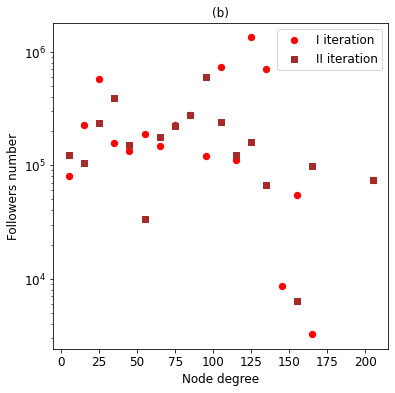

In [116]:
plot_binned_followers_number_distribution_per_node(G_anti_hubs_2_iter, G_anti_hubs_3_iter, df_anti_hubs_2_iter, df_anti_hubs_3_iter, 10)

In [ ]:
# CLUSTERING COEFFICIENT PER NODE

In [ ]:
def plot_clustering_coeffiecient_distribution_per_node(graph1, graph2):
    grouped_1_nodes = defaultdict(list)
    grouped_2_nodes = defaultdict(list)

    for node_name, degree in sorted(graph1.degree, key=lambda x: x[1], reverse=True):
        grouped_1_nodes[degree].append(node_name)
    
    for node_name, degree in sorted(graph2.degree, key=lambda x: x[1], reverse=True):
        grouped_2_nodes[degree].append(node_name)
        
    cluster_coeffs_1 = nx.clustering(graph1)
    cluster_coeffs_2 = nx.clustering(graph2)
    
    grouped_1_cluster_coef_values_nodes = defaultdict(list)
    grouped_2_cluster_coef_values_nodes = defaultdict(list)

    for k,v in grouped_1_nodes.items():
        for i in v:
            try:
                grouped_1_cluster_coef_values_nodes[k].append(cluster_coeffs_1.get(i))
            except:
                continue

    for k,v in grouped_2_nodes.items():
        for i in v:
            try:
                grouped_2_cluster_coef_values_nodes[k].append(cluster_coeffs_2.get(i))
            except:
                continue
                
    # PLOT
#     plt.rcParams.update(plt.rcParamsDefault)
#     plt.rcParams.update({'figure.figsize': (16, 16)})
    plt.figure(figsize=(6, 6))

    for index, (k, v) in enumerate(grouped_1_cluster_coef_values_nodes.items()):
        for index2, i in enumerate(v):
            if index == 0 and index2 == 0:
                plt.scatter(k, i, color='blue', s=15, marker="o", label='1 iteratrion filtered with hubs from 2 iteration')
            else:
                plt.scatter(k, i, color='blue', s=15, marker="o")

    for index, (k, v) in enumerate(grouped_2_cluster_coef_values_nodes.items()):
        for index2, i in enumerate(v):
            if index == 0 and index2 == 0:
                plt.scatter(k, i, color='red', s=15, marker="s",  label='2 iteration')
            else:
                plt.scatter(k, i, color='red', s=15, marker="s")        
    
    #plt.title('Cluster coefficient vs node degree distribution')
    plt.xlabel('Node degree')
    plt.ylabel('Cluster coefficient value')
    plt.legend()
    plt.show()

In [ ]:
plot_clustering_coeffiecient_distribution_per_node(G_pro_hubs_1_iter_filtered_with_hubs_from_2_iter, G_pro_hubs_2_iter)

In [ ]:
# BINNED CLUSTERING COEFFICIENT PER NODE

In [119]:
def plot_binned_clustering_coeffiecient_distribution_per_node(graph1, graph2, bin_size):
    
    grouped_1_nodes = defaultdict(list)
    grouped_2_nodes = defaultdict(list)

    for node_name, degree in sorted(graph1.degree, key=lambda x: x[1], reverse=True):
        grouped_1_nodes[degree].append(node_name)
    
    for node_name, degree in sorted(graph2.degree, key=lambda x: x[1], reverse=True):
        grouped_2_nodes[degree].append(node_name)
        
    cluster_coeffs_1 = nx.clustering(graph1)
    cluster_coeffs_2 = nx.clustering(graph2)
    
    binned_1_nodes = defaultdict(list)
    binned_2_nodes = defaultdict(list)
    
    for i in range(0, max(grouped_1_nodes.keys())+bin_size, bin_size):
        for k, v in grouped_1_nodes.items():
            if k <= i and k > i - bin_size:
                binned_1_nodes[i].extend(v)

    for i in range(0, max(grouped_2_nodes.keys())+bin_size, bin_size):
        for k, v in grouped_2_nodes.items():
            if k <= i and k > i - bin_size:
                binned_2_nodes[i].extend(v)


    binned_1_cluster_coef_values_nodes = defaultdict(list)
    binned_2_cluster_coef_values_nodes = defaultdict(list)

    for k, v in binned_1_nodes.items():
        for i in v:
            try:
                binned_1_cluster_coef_values_nodes[k].append(cluster_coeffs_1.get(i))
            except:
                continue

    for k, v in binned_2_nodes.items():
        for i in v:
            try:
                binned_2_cluster_coef_values_nodes[k].append(cluster_coeffs_2.get(i))
            except:
                continue

    binned_1_mean_cluster_coef_values_nodes = defaultdict(float)
    binned_2_mean_cluster_coef_values_nodes = defaultdict(float)

    for k, v in binned_1_cluster_coef_values_nodes.items():
        binned_1_mean_cluster_coef_values_nodes[k] = mean(v)

    for k, v in binned_2_cluster_coef_values_nodes.items():
        binned_2_mean_cluster_coef_values_nodes[k] = mean(v)
                
            
    # PLOT
    
    plt.figure(figsize=(6, 6))
        
    for index, (k, v) in enumerate(binned_1_mean_cluster_coef_values_nodes.items()):
        if index == 0:
            plt.scatter(k-bin_size/2, v, color='red', s=40, marker="o", label='I iteration')
        else:
            plt.scatter(k-bin_size/2, v, color='red', s=40, marker="o")

    for index, (k, v) in enumerate(binned_2_mean_cluster_coef_values_nodes.items()):
        if index == 0:
            plt.scatter(k-bin_size/2, v, color='brown', s=40, marker="s",  label='II iteration')
        else:
            plt.scatter(k-bin_size/2, v, color='brown', s=40, marker="s")

    #plt.title(f'Bined cluster coefficient vs node degree distribution with bin size = {bin_size}')
    plt.title('(b)')
    plt.xlabel('Node degree', fontsize=12)
    plt.ylabel('Averaged cluster coefficient value', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)

    plt.show()

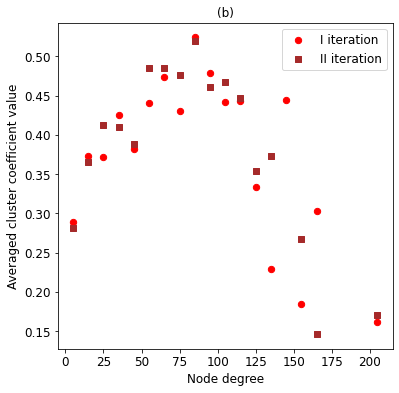

In [120]:
plot_binned_clustering_coeffiecient_distribution_per_node(G_anti_hubs_2_iter, G_anti_hubs_3_iter, 10)

In [ ]:
# PEARSON CORRELATION COEFFICIENT

In [ ]:
anti_r = nx.degree_pearson_correlation_coefficient(G_anti_hubs, x='in', y='out')
pro_r = nx.degree_pearson_correlation_coefficient(G_pro_hubs, x='in', y='out')

In [ ]:
print(f'Pearson correlation coeffiecnt for anti: {anti_r}')
print(f'Pearson correlation coeffiecnt for pro: {pro_r}')

In [ ]:
# ASSORTATIVITY COEFFICIENT

In [ ]:
anti_r = nx.degree_assortativity_coefficient(G_anti_hubs, x='in', y='out')
pro_r = nx.degree_assortativity_coefficient(G_pro_hubs, x='in', y='out')

In [ ]:
print(f'Assortativity coeffiecnt for anti: {anti_r}')
print(f'Assortativity coeffiecnt for pro: {pro_r}')

In [ ]:
# AVERAGE NEIGHBOR DEGREE DISTRIBUTION

In [ ]:
def plot_average_neighbor_degree_distribution_per_node(graph1, graph2):
    
    grouped_1_nodes = defaultdict(list)
    grouped_2_nodes = defaultdict(list)

    for node_name, degree in sorted(graph1.degree, key=lambda x: x[1], reverse=True):
        grouped_1_nodes[degree].append(node_name)
    
    for node_name, degree in sorted(graph2.degree, key=lambda x: x[1], reverse=True):
        grouped_2_nodes[degree].append(node_name)
    
    avg_neighbour_deg_in_in_1 = nx.average_neighbor_degree(graph1, source="in", target="in")
    avg_neighbour_deg_in_out_1 = nx.average_neighbor_degree(graph1, source="in", target="out")
    avg_neighbour_deg_out_in_1 = nx.average_neighbor_degree(graph1, source="out", target="in")
    avg_neighbour_deg_out_out_1 = nx.average_neighbor_degree(graph1, source="out", target="out")
    
    avg_neighbour_deg_in_in_2 = nx.average_neighbor_degree(graph2, source="in", target="in")
    avg_neighbour_deg_in_out_2 = nx.average_neighbor_degree(graph2, source="in", target="out")
    avg_neighbour_deg_out_in_2 = nx.average_neighbor_degree(graph2, source="out", target="in")
    avg_neighbour_deg_out_out_2 = nx.average_neighbor_degree(graph2, source="out", target="out")
    
    grouped_1_avg_neighbour_deg_nodes_in_in = defaultdict(list)
    grouped_1_avg_neighbour_deg_nodes_in_out = defaultdict(list)
    grouped_1_avg_neighbour_deg_nodes_out_in = defaultdict(list)
    grouped_1_avg_neighbour_deg_nodes_out_out = defaultdict(list)

    grouped_2_avg_neighbour_deg_nodes_in_in = defaultdict(list)
    grouped_2_avg_neighbour_deg_nodes_in_out = defaultdict(list)
    grouped_2_avg_neighbour_deg_nodes_out_in = defaultdict(list)
    grouped_2_avg_neighbour_deg_nodes_out_out = defaultdict(list)

    for k,v in grouped_1_nodes.items():
        for i in v:
            try:
                grouped_1_avg_neighbour_deg_nodes_in_in[k].append(avg_neighbour_deg_in_in_1.get(i))
                grouped_1_avg_neighbour_deg_nodes_in_out[k].append(avg_neighbour_deg_in_out_1.get(i))
                grouped_1_avg_neighbour_deg_nodes_out_in[k].append(avg_neighbour_deg_out_in_1.get(i))
                grouped_1_avg_neighbour_deg_nodes_out_out[k].append(avg_neighbour_deg_out_out_1.get(i))
            except:
                continue

    for k,v in grouped_2_nodes.items():
        for i in v:
            try:
                grouped_2_avg_neighbour_deg_nodes_in_in[k].append(avg_neighbour_deg_in_in_2.get(i))
                grouped_2_avg_neighbour_deg_nodes_in_out[k].append(avg_neighbour_deg_in_out_2.get(i))
                grouped_2_avg_neighbour_deg_nodes_out_in[k].append(avg_neighbour_deg_out_in_2.get(i))
                grouped_2_avg_neighbour_deg_nodes_out_out[k].append(avg_neighbour_deg_out_out_2.get(i))
            except:
                continue
    
    # PLOTS

    plt.figure(figsize=(6, 6))
        
    for index, (k, v) in enumerate(grouped_1_avg_neighbour_deg_nodes_in_in.items()):
        for index2, i in enumerate(v):
            if index == 0 and index2 == 0:
                plt.scatter(k, i, color='blue', s=15, marker="o", label='1 iteratrion filtered with hubs from 2 iteration')
            else:
                plt.scatter(k, i, color='blue', s=15, marker="o")

    for index, (k, v) in enumerate(grouped_2_avg_neighbour_deg_nodes_in_in.items()):
        for index2, i in enumerate(v):
            if index == 0 and index2 == 0:
                plt.scatter(k, i, color='red', s=15, marker="s",  label='2 iteration')
            else:
                plt.scatter(k, i, color='red', s=15, marker="s")         
            
    #plt.title('Average neighbor degree (in in) vs node degree distribution')
    plt.xlabel('Node degree')
    plt.ylabel('Average neighbor degree')
    plt.yscale('log')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(6, 6))

    for index, (k, v) in enumerate(grouped_1_avg_neighbour_deg_nodes_in_out.items()):
        for index2, i in enumerate(v):
            if index == 0 and index2 == 0:
                plt.scatter(k, i, color='blue', s=15, marker="o", label='1 iteratrion filtered with hubs from 2 iteration')
            else:
                plt.scatter(k, i, color='blue', s=15, marker="o")

    for index, (k, v) in enumerate(grouped_2_avg_neighbour_deg_nodes_in_out.items()):
        for index2, i in enumerate(v):
            if index == 0 and index2 == 0:
                plt.scatter(k, i, color='red', s=15, marker="s",  label='2 iteration')
            else:
                plt.scatter(k, i, color='red', s=15, marker="s")    

    #plt.title('Average neighbor degree (in out) vs node degree distribution')
    plt.xlabel('Node degree')
    plt.ylabel('Average neighbor degree')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(6, 6))

    for index, (k, v) in enumerate(grouped_1_avg_neighbour_deg_nodes_out_in.items()):
        for index2, i in enumerate(v):
            if index == 0 and index2 == 0:
                plt.scatter(k, i, color='blue', s=40, marker="o", label='I iteratrion')
            else:
                plt.scatter(k, i, color='blue', s=40, marker="o")

    for index, (k, v) in enumerate(grouped_2_avg_neighbour_deg_nodes_out_in.items()):
        for index2, i in enumerate(v):
            if index == 0 and index2 == 0:
                plt.scatter(k, i, color='navy', s=15, marker="s",  label='II iteration')
            else:
                plt.scatter(k, i, color='navy', s=15, marker="s") 

    #plt.title('Average neighbor degree (out in) vs node degree distribution')
    
    plt.title('(a)')
    plt.xlabel('Node degree', fontsize=12)
    plt.ylabel('Average neighbour degree', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.show()
    
    
    plt.figure(figsize=(6, 6))

    for index, (k, v) in enumerate(grouped_1_avg_neighbour_deg_nodes_out_out.items()):
        for index2, i in enumerate(v):
            if index == 0 and index2 == 0:
                plt.scatter(k, i, color='blue', s=40, marker="o", label='I iteratrion')
            else:
                plt.scatter(k, i, color='blue', s=40, marker="o")

    for index, (k, v) in enumerate(grouped_2_avg_neighbour_deg_nodes_out_out.items()):
        for index2, i in enumerate(v):
            if index == 0 and index2 == 0:
                plt.scatter(k, i, color='navy', s=40, marker="s",  label='II iteration')
            else:
                plt.scatter(k, i, color='navy', s=40, marker="s")

    #plt.title('Average neighbor degree (out out) vs node degree distribution')
    plt.title('(a)')
    plt.xlabel('Node degree', fontsize=12)
    plt.ylabel('Average neighbour degree', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.show()

In [ ]:
plot_average_neighbor_degree_distribution_per_node(G_pro_hubs_1_iter_filtered_with_hubs_from_2_iter, G_pro_hubs_2_iter)

In [124]:
def plot_binned_average_neighbor_degree_distribution_per_node(graph1, graph2, bin_size):
    
    grouped_1_nodes = defaultdict(list)
    grouped_2_nodes = defaultdict(list)

    for node_name, degree in sorted(graph1.degree, key=lambda x: x[1], reverse=True):
        grouped_1_nodes[degree].append(node_name)
    
    for node_name, degree in sorted(graph2.degree, key=lambda x: x[1], reverse=True):
        grouped_2_nodes[degree].append(node_name)
    
    avg_neighbour_deg_in_in_1 = nx.average_neighbor_degree(graph1, source="in", target="in")
    avg_neighbour_deg_in_out_1 = nx.average_neighbor_degree(graph1, source="in", target="out")
    avg_neighbour_deg_out_in_1 = nx.average_neighbor_degree(graph1, source="out", target="in")
    avg_neighbour_deg_out_out_1 = nx.average_neighbor_degree(graph1, source="out", target="out")
    
    avg_neighbour_deg_in_in_2 = nx.average_neighbor_degree(graph2, source="in", target="in")
    avg_neighbour_deg_in_out_2 = nx.average_neighbor_degree(graph2, source="in", target="out")
    avg_neighbour_deg_out_in_2 = nx.average_neighbor_degree(graph2, source="out", target="in")
    avg_neighbour_deg_out_out_2 = nx.average_neighbor_degree(graph2, source="out", target="out")
    
    binned_1_nodes = defaultdict(list)
    binned_2_nodes = defaultdict(list)
    
    for i in range(0, max(grouped_1_nodes.keys())+bin_size, bin_size):
        for k, v in grouped_1_nodes.items():
            if k <= i and k > i - bin_size:
                binned_1_nodes[i].extend(v)

    for i in range(0, max(grouped_2_nodes.keys())+bin_size, bin_size):
        for k, v in grouped_2_nodes.items():
            if k <= i and k > i - bin_size:
                binned_2_nodes[i].extend(v)
    
    
    binned_1_avg_neighbour_deg_nodes_in_in = defaultdict(list)
    binned_1_avg_neighbour_deg_nodes_in_out = defaultdict(list)
    binned_1_avg_neighbour_deg_nodes_out_in = defaultdict(list)
    binned_1_avg_neighbour_deg_nodes_out_out = defaultdict(list)

    binned_2_avg_neighbour_deg_nodes_in_in = defaultdict(list)
    binned_2_avg_neighbour_deg_nodes_in_out = defaultdict(list)
    binned_2_avg_neighbour_deg_nodes_out_in = defaultdict(list)
    binned_2_avg_neighbour_deg_nodes_out_out = defaultdict(list)

    for k, v in binned_1_nodes.items():
        for i in v:
            try:
                binned_1_avg_neighbour_deg_nodes_in_in[k].append(avg_neighbour_deg_in_in_1.get(i))
                binned_1_avg_neighbour_deg_nodes_in_out[k].append(avg_neighbour_deg_in_out_1.get(i))
                binned_1_avg_neighbour_deg_nodes_out_in[k].append(avg_neighbour_deg_out_in_1.get(i))
                binned_1_avg_neighbour_deg_nodes_out_out[k].append(avg_neighbour_deg_out_out_1.get(i))
            except:
                continue

    for k, v in binned_2_nodes.items():
        for i in v:
            try:
                binned_2_avg_neighbour_deg_nodes_in_in[k].append(avg_neighbour_deg_in_in_2.get(i))
                binned_2_avg_neighbour_deg_nodes_in_out[k].append(avg_neighbour_deg_in_out_2.get(i))
                binned_2_avg_neighbour_deg_nodes_out_in[k].append(avg_neighbour_deg_out_in_2.get(i))
                binned_2_avg_neighbour_deg_nodes_out_out[k].append(avg_neighbour_deg_out_out_2.get(i))
            except:
                continue
                
    binned_1_mean_avg_neighbour_deg_nodes_in_in = defaultdict(list)
    binned_1_mean_avg_neighbour_deg_nodes_in_out = defaultdict(list)
    binned_1_mean_avg_neighbour_deg_nodes_out_in = defaultdict(list)
    binned_1_mean_avg_neighbour_deg_nodes_out_out = defaultdict(list)

    binned_2_mean_avg_neighbour_deg_nodes_in_in = defaultdict(list)
    binned_2_mean_avg_neighbour_deg_nodes_in_out = defaultdict(list)
    binned_2_mean_avg_neighbour_deg_nodes_out_in = defaultdict(list)
    binned_2_mean_avg_neighbour_deg_nodes_out_out = defaultdict(list)
    
    for k, v in binned_1_avg_neighbour_deg_nodes_in_in.items():
        binned_1_mean_avg_neighbour_deg_nodes_in_in[k] = mean(v)
        
    for k, v in binned_1_avg_neighbour_deg_nodes_in_out.items():
        binned_1_mean_avg_neighbour_deg_nodes_in_out[k] = mean(v)
        
    for k, v in binned_1_avg_neighbour_deg_nodes_out_in.items():
        binned_1_mean_avg_neighbour_deg_nodes_out_in[k] = mean(v)
        
    for k, v in binned_1_avg_neighbour_deg_nodes_out_out.items():
        binned_1_mean_avg_neighbour_deg_nodes_out_out[k] = mean(v)
        
    
    for k, v in binned_2_avg_neighbour_deg_nodes_in_in.items():
        binned_2_mean_avg_neighbour_deg_nodes_in_in[k] = mean(v)
        
    for k, v in binned_2_avg_neighbour_deg_nodes_in_out.items():
        binned_2_mean_avg_neighbour_deg_nodes_in_out[k] = mean(v)
        
    for k, v in binned_2_avg_neighbour_deg_nodes_out_in.items():
        binned_2_mean_avg_neighbour_deg_nodes_out_in[k] = mean(v)
        
    for k, v in binned_2_avg_neighbour_deg_nodes_out_out.items():
        binned_2_mean_avg_neighbour_deg_nodes_out_out[k] = mean(v)
    
    # PLOTS

    plt.figure(figsize=(6, 6))
     
    for index, (k, v) in enumerate(binned_1_mean_avg_neighbour_deg_nodes_in_in.items()):
        if index == 0:
            plt.scatter(k-bin_size/2, v, color='blue', s=15, marker="o", label='1 iteratrion filtered with hubs from 2 iteration')
        else:
            plt.scatter(k-bin_size/2, v, color='blue', s=15, marker="o")

    for index, (k, v) in enumerate(binned_2_mean_avg_neighbour_deg_nodes_in_in.items()):
        if index == 0:
            plt.scatter(k-bin_size/2, v, color='red', s=15, marker="s",  label='2 iteration')
        else:
            plt.scatter(k-bin_size/2, v, color='red', s=15, marker="s")

    #plt.title(f'Binned average neighbor degree (in in) vs node degree distribution with bin size = {bin_size}')
    plt.xlabel('Node degree')
    plt.ylabel('Average neighbor degree')
    plt.yscale('log')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(6, 6))

    for index, (k, v) in enumerate(binned_1_mean_avg_neighbour_deg_nodes_in_out.items()):
        if index == 0:
            plt.scatter(k-bin_size/2, v, color='blue', s=15, marker="o", label='1 iteratrion filtered with hubs from 2 iteration')
        else:
            plt.scatter(k-bin_size/2, v, color='blue', s=15, marker="o")

    for index, (k, v) in enumerate(binned_2_mean_avg_neighbour_deg_nodes_in_out.items()):
        if index == 0:
            plt.scatter(k-bin_size/2, v, color='red', s=15, marker="s",  label='2 iteration')
        else:
            plt.scatter(k-bin_size/2, v, color='red', s=15, marker="s")
        
    #plt.title(f'Binned average neighbor degree (in out) vs node degree distribution with bin size = {bin_size}')
    plt.xlabel('Node degree')
    plt.ylabel('Average neighbor degree')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(6, 6))

    for index, (k, v) in enumerate(binned_1_mean_avg_neighbour_deg_nodes_out_in.items()):
        if index == 0:
            plt.scatter(k-bin_size/2, v, color='red', s=40, marker="o", label='I iteratrion')
        else:
            plt.scatter(k-bin_size/2, v, color='red', s=40, marker="o")

    for index, (k, v) in enumerate(binned_2_mean_avg_neighbour_deg_nodes_out_in.items()):
        if index == 0:
            plt.scatter(k-bin_size/2, v, color='brown', s=40, marker="s",  label='II iteration')
        else:
            plt.scatter(k-bin_size/2, v, color='brown', s=40, marker="s")

    #plt.title(f'Binned average neighbor degree (out in) vs node degree distribution with bin size = {bin_size}')
    plt.title('(b)')
    plt.xlabel('Node degree', fontsize=12)
    plt.ylabel('Average neighbour degree', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.show()
    
    plt.figure(figsize=(6, 6))

    for index, (k, v) in enumerate(binned_1_mean_avg_neighbour_deg_nodes_out_out.items()):
        if index == 0:
            plt.scatter(k-bin_size/2, v, color='red', s=30, marker="o", label='I iteratrion')
        else:
            plt.scatter(k-bin_size/2, v, color='red', s=30, marker="o")

    for index, (k, v) in enumerate(binned_2_mean_avg_neighbour_deg_nodes_out_out.items()):
        if index == 0:
            plt.scatter(k-bin_size/2, v, color='brown', s=30, marker="s",  label='II iteration')
        else:
            plt.scatter(k-bin_size/2, v, color='brown', s=30, marker="s")

    #plt.title(f'Binned average neighbor degree (out out) vs node degree distribution with bin size = {bin_size}')
    plt.title('(b)')
    plt.xlabel('Node degree', fontsize=12)
    plt.ylabel('Average neighbour degree', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.show()

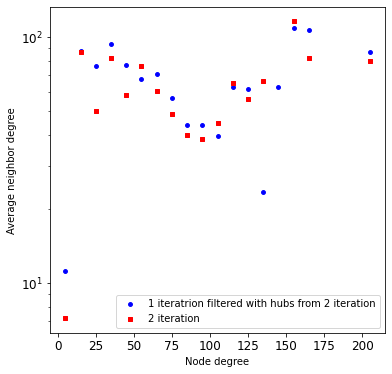

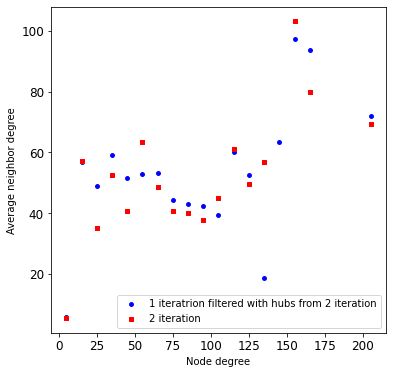

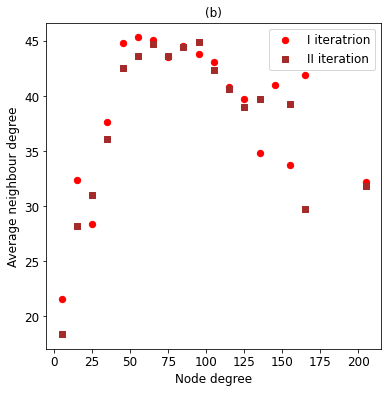

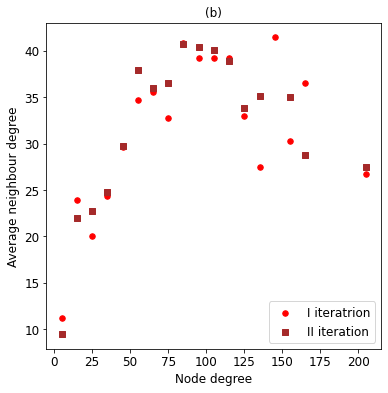

In [125]:
plot_binned_average_neighbor_degree_distribution_per_node(G_anti_hubs_2_iter, G_anti_hubs_3_iter, 10)

In [ ]:
def plot_binned_average_neighbor_degree_distribution_per_node_undirected_graph(anti_graph, pro_graph, bin_size):
    
    grouped_anti_nodes = defaultdict(list)
    grouped_pro_nodes = defaultdict(list)

    for node_name, degree in sorted(anti_graph.degree, key=lambda x: x[1], reverse=True):
        grouped_anti_nodes[degree].append(node_name)
    
    for node_name, degree in sorted(pro_graph.degree, key=lambda x: x[1], reverse=True):
        grouped_pro_nodes[degree].append(node_name)
    
    
    anti_avg_neighbour_deg = nx.average_neighbor_degree(anti_graph)
    pro_avg_neighbour_deg = nx.average_neighbor_degree(pro_graph)

    binned_anti_nodes = defaultdict(list)
    binned_pro_nodes = defaultdict(list)
    
    for i in range(0, max(grouped_anti_nodes.keys())+bin_size, bin_size):
        for k, v in grouped_anti_nodes.items():
            if k <= i and k > i - bin_size:
                binned_anti_nodes[i].extend(v)

    for i in range(0, max(grouped_pro_nodes.keys())+bin_size, bin_size):
        for k, v in grouped_pro_nodes.items():
            if k <= i and k > i - bin_size:
                binned_pro_nodes[i].extend(v)
    
    
    binned_anti_avg_neighbour_deg_nodes = defaultdict(list)
    binned_pro_avg_neighbour_deg_nodes = defaultdict(list)

    for k, v in binned_anti_nodes.items():
        for i in v:
            try:
                binned_anti_avg_neighbour_deg_nodes[k].append(anti_avg_neighbour_deg.get(i))
            except:
                continue

    for k, v in binned_pro_nodes.items():
        for i in v:
            try:
                binned_pro_avg_neighbour_deg_nodes[k].append(pro_avg_neighbour_deg.get(i))
            except:
                continue
                
    binned_anti_mean_avg_neighbour_deg_nodes = defaultdict(list)
    binned_pro_mean_avg_neighbour_deg_nodes = defaultdict(list)
    
    
    for k, v in binned_anti_avg_neighbour_deg_nodes.items():
        binned_anti_mean_avg_neighbour_deg_nodes[k] = mean(v)

        
    for k, v in binned_pro_avg_neighbour_deg_nodes.items():
        binned_pro_mean_avg_neighbour_deg_nodes[k] = mean(v)

    
    # PLOTS
    plt.rcParams.update(plt.rcParamsDefault)
    plt.rcParams.update({'figure.figsize': (16, 16)})
    #plt.figure(figsize=(12, 12))

    for k, v in binned_pro_mean_avg_neighbour_deg_nodes.items():
        plt.scatter(k-bin_size/2, v, color='blue', s=10)

    for k, v in binned_anti_mean_avg_neighbour_deg_nodes.items():
        plt.scatter(k-bin_size/2, v, color='red', s=10)

    plt.title(f'Binned average neighbor degree vs node degree distribution with bin size = {bin_size}')
    plt.xlabel('Node degree')
    plt.ylabel('Average neighbor degree')
    plt.yscale('log')
    plt.show()

In [ ]:
plot_binned_average_neighbor_degree_distribution_per_node_undirected_graph(G_anti_hubs_undirected, G_pro_hubs_undirected, 10)

In [ ]:
G = nx.DiGraph([(0, 3), (1, 3), (2, 4), (3, 5), (3, 6), (4, 6), (6, 5), (4, 3), (6, 4)])


# group nodes by column
left_nodes = [0, 1, 2]
middle_nodes = [3, 4]
right_nodes = [5, 6]

# set the position according to column (x-coord)
pos = {n: (0, i) for i, n in enumerate(left_nodes)}
pos.update({n: (1, i + 0.5) for i, n in enumerate(middle_nodes)})
pos.update({n: (2, i + 0.5) for i, n in enumerate(right_nodes)})

nx.draw_networkx(G, pos)

# Set margins for the axes so that nodes aren't clipped
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (16, 16)})
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [ ]:
print(f'in-in: {nx.average_neighbor_degree(G, source="in", target="in")}')
print(f'in-out: {nx.average_neighbor_degree(G, source="in", target="out")}')
print(f'out-in: {nx.average_neighbor_degree(G, source="out", target="in")}')
print(f'out-out: {nx.average_neighbor_degree(G, source="out", target="out")}')

In [ ]:
G.degree()

In [ ]:
G.in_degree()

In [ ]:
G.out_degree()